## **EDA and Imputation of SUPPORT2 Dataset**

In [ ]:
!pip install pydataset

import pandas as pd
import numpy as np
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.linear_model import BayesianRidge
from sklearn.decomposition import PCA
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from pydataset import data
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
import plotly.express as px
rng = np.random.default_rng(42)

def missing_summary(data, plot_heatmap=False):
    """
    Returns a table summarizing missing data:
    - Feature name
    - Number of missing values
    - Percentage of missingness
    - Data type
    - If plot_heatmap=True, returns a heatmap of all missingness per variables.

    Parameters:
    - data (pd.DataFrame): The dataset to analyze
    - plot_heatmap (bool): Whether to show a heatmap of missingness (only columns with missing data)

    Returns:
    - pd.DataFrame: Table summarizing missingness
    """
    missing_table = (
        data.isnull().sum()
        .to_frame(name='Missing Count')
        .assign(
            Missing_Percent=lambda x: 100 * x['Missing Count'] / len(data),
            Dtype=data.dtypes
        )
        .query("`Missing Count` > 0")
        .sort_values('Missing Count', ascending=False)
    )

    missing_table.reset_index(names='Feature', inplace=True)

    if plot_heatmap:
        missing_cols = missing_table['Feature'].tolist()
        plt.figure(figsize=(12, 6))
        sns.heatmap(data[missing_cols].isnull(), cbar=False, cmap='viridis', yticklabels=False)
        plt.title("Missing Values Heatmap (Only Columns with NA)", fontsize=14)
        plt.xlabel("Features")
        plt.tight_layout()
        plt.show()

    return missing_table

  Using cached pydataset-0.2.0.tar.gz (15.9 MB)
  Preparing metadata (setup.py) ... done
  Created wheel for pydataset: filename=pydataset-0.2.0-py3-none-any.whl size=15939418 sha256=0e86eb51e80ebee2f97a245cd37903b7ba4779ae50868722e79b7d4c812d4313
  Stored in directory: /Users/harisreedeth/Library/Caches/pip/wheels/29/93/3f/af54c413cecaac292940342c61882d2a8848674175d0bb0889
Successfully built pydataset

[notice] A new release of pip is available: 24.1.1 -> 25.2
[notice] To update, run: pip install --upgrade pip
initiated datasets repo at: /Users/harisreedeth/.pydataset/


In [2]:
path = '/content/drive/MyDrive/Colab Notebooks/support2/kaggleData/support2.csv'
data = pd.read_csv(path)
dmain = data.copy()

data.describe().T

count          mean            std          min          25%  \
age       9105.0     62.650823      15.593710    18.041990    52.797000   
death     9105.0      0.681054       0.466094     0.000000     0.000000   
hospdead  9105.0      0.259198       0.438219     0.000000     0.000000   
slos      9105.0     17.863042      22.006440     3.000000     6.000000   
d.time    9105.0    478.449863     560.383272     3.000000    26.000000   
num.co    9105.0      1.868644       1.344409     0.000000     1.000000   
edu       7471.0     11.747691       3.447743     0.000000    10.000000   
scoma     9104.0     12.058546      24.636694     0.000000     0.000000   
charges   8933.0  59995.787811  102648.778198  1169.000000  9740.000000   
totcst    8217.0  30825.867768   45780.820986     0.000000  5929.566400   
totmcst   5630.0  28828.877838   43604.261932  -102.719970  5177.404300   
avtisst   9023.0     22.610928      13.233248     1.000000    12.000000   
sps       9104.0     25.525872       9.899377     0.199982    19.000000   
aps       9104.0     37.597979      19.903852     0.000000    23.000000   
surv2m    9104.0      0.635870       0.248175     0.000000     0.507690   
surv6m    9104.0      0.520096       0.253343     0.000000     0.342957   
hday      9105.0      4.400000       9.126811     1.000000     1.000000   
diabetes  9105.0      0.195277       0.396436     0.000000     0.000000   
dementia  9105.0      0.032510       0.177359     0.000000     0.000000   
prg2m     7456.0      0.618769       0.298367     0.000000     0.500000   
prg6m     7472.0      0.499679       0.304367     0.000000     0.200000   
dnrday    9075.0     14.582590      19.944216   -88.000000     4.000000   
meanbp    9104.0     84.546408      27.687692     0.000000    63.000000   
wblc      8893.0     12.347677       9.266329     0.000000     7.000000   
hrt       9104.0     97.156711      31.559292     0.000000    72.000000   
resp      9104.0     23.330294       9.573801     0.000000    18.000000   
temp      9104.0     37.103341       1.251796    31.699220    36.195310   
pafi      6780.0    239.529070     109.665593    12.000000   155.093750   
alb       5733.0      2.950520       0.875944     0.399963     2.399902   
bili      6504.0      2.554463       5.318448     0.099991     0.500000   
crea      9038.0      1.770961       1.686041     0.099991     0.899902   
sod       9104.0    137.568541       6.029326   110.000000   134.000000   
ph        6821.0      7.415364       0.080563     6.829102     7.379883   
glucose   4605.0    159.873398      88.391541     0.000000   103.000000   
bun       4753.0     32.349463      26.792288     1.000000    14.000000   
urine     4243.0   2191.546047    1455.245777     0.000000  1165.500000   
adlp      3464.0      1.157910       1.739672     0.000000     0.000000   
adls      6238.0      1.637384       2.231358     0.000000     0.000000   
adlsc     9105.0      1.888272       2.003763     0.000000     0.000000   

                   50%           75%           max  
age          64.856990     73.998960  1.018480e+02  
death         1.000000      1.000000  1.000000e+00  
hospdead      0.000000      1.000000  1.000000e+00  
slos         11.000000     20.000000  3.430000e+02  
d.time      233.000000    761.000000  2.029000e+03  
num.co        2.000000      3.000000  9.000000e+00  
edu          12.000000     14.000000  3.100000e+01  
scoma         0.000000      9.000000  1.000000e+02  
charges   25024.000000  64598.000000  1.435423e+06  
totcst    14452.734400  36087.937500  6.332120e+05  
totmcst   13223.500000  34223.601600  7.106820e+05  
avtisst      19.500000     31.666656  8.300000e+01  
sps          23.898438     30.199219  9.918750e+01  
aps          34.000000     49.000000  1.430000e+02  
surv2m        0.715942      0.825928  9.699707e-01  
surv6m        0.574951      0.725952  9.479980e-01  
hday          1.000000      3.000000  1.480000e+02  
diabetes      0.000000      0.000000  1.000000e+00  
dem

In [3]:
data.shape

(9105, 47)

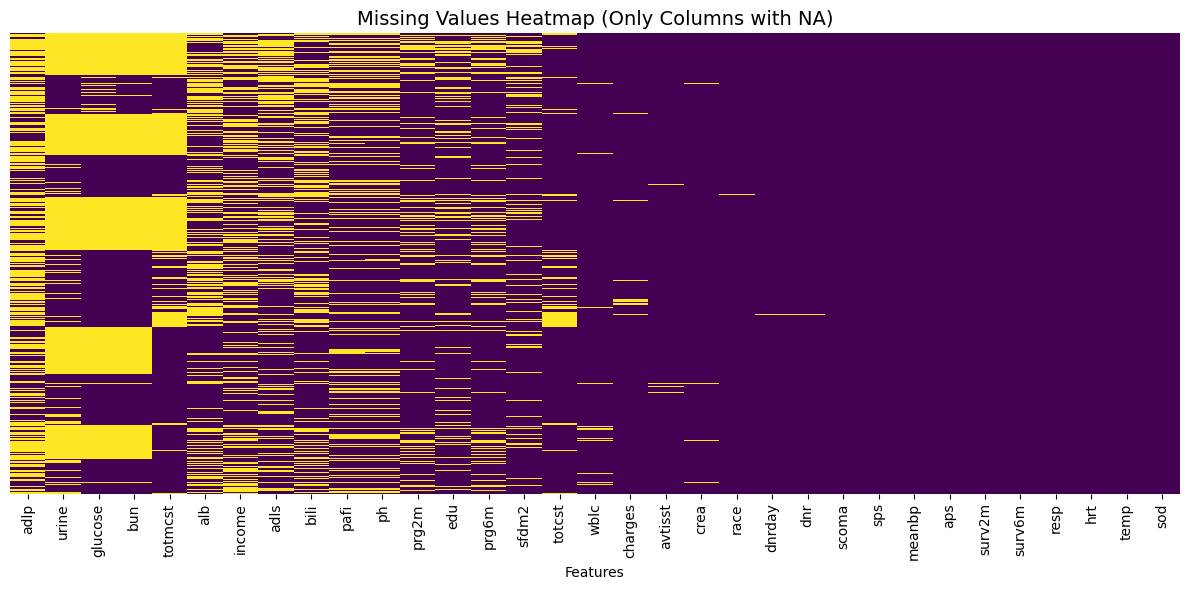

Feature  Missing Count  Missing_Percent    Dtype
0      adlp           5641        61.954970  float64
1     urine           4862        53.399231  float64
2   glucose           4500        49.423394  float64
3       bun           4352        47.797913  float64
4   totmcst           3475        38.165843  float64
5       alb           3372        37.034596  float64
6    income           2982        32.751236   object
7      adls           2867        31.488193  float64
8      bili           2601        28.566722  float64
9      pafi           2325        25.535420  float64
10       ph           2284        25.085118  float64
11    prg2m           1649        18.110928  float64
12      edu           1634        17.946183  float64
13    prg6m           1633        17.935200  float64
14    sfdm2           1400        15.376167   object
15   totcst            888         9.752883  float64
16     wblc            212         2.328391  float64
17  charges            172         1.889072  float64
18  avtisst             82         0.900604  float64
19     crea             67         0.735859  float64
20     race             42         0.461285   object
21   dnrday             30         0.329489  float64
22      dnr             30         0.329489   object
23    scoma              1         0.010983  float64
24      sps              1         0.010983  float64
25   meanbp              1         0.010983  float64
26      aps              1         0.010983  float64
27   surv2m              1         0.010983  float64
28   surv6m              1         0.010983  float64
29     resp              1         0.010983  float64
30      hrt              1         0.010983  float64
31     temp              1         0.010983  float64
32      sod              1         0.010983  float64

In [4]:
missing_summary(data, plot_heatmap=True)

In [ ]:
# Iputing to naormal values as suggested by data custodians.
normal_values = {
    'alb': 3.5,
    'pafi': 333.3,
    'bili': 1.01,
    'crea': 1.01,
    'bun': 6.51,
    'wblc': 9,
    'urine': 2502
}

data.fillna(value=normal_values, inplace=True)

missing_counts = data.isnull().sum()
low_missing_cols = missing_counts[missing_counts <= 82] # dropping all rows that has lesser than 82 missing datapoints. > 1%.
columns_with_missing = [col for col, count in low_missing_cols.items() if count > 0]
print(f"Dropping rows with missing values in the following columns (≤ 82 missing per column):\n{columns_with_missing}")
data = data.dropna(subset=columns_with_missing)

Dropping rows with missing values in the following columns (≤ 82 missing per column):
['scoma', 'avtisst', 'race', 'sps', 'aps', 'surv2m', 'surv6m', 'dnr', 'dnrday', 'meanbp', 'hrt', 'resp', 'temp', 'sod']


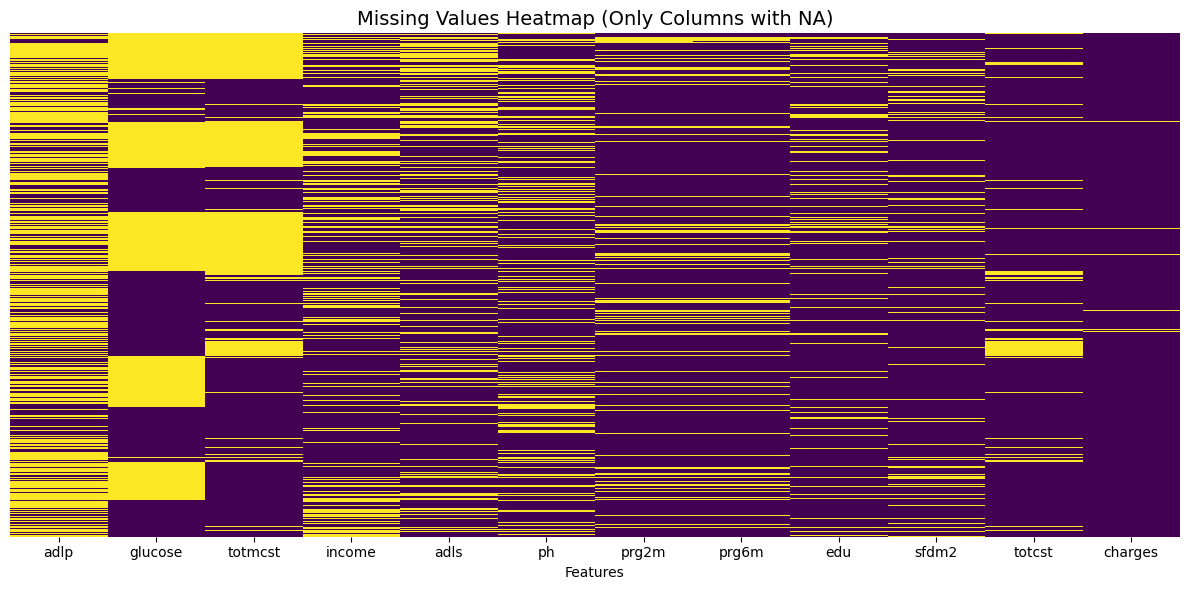

Feature  Missing Count  Missing_Percent    Dtype
0      adlp           5538        61.870182  float64
1   glucose           4459        49.815663  float64
2   totmcst           3414        38.140990  float64
3    income           2911        32.521506   object
4      adls           2768        30.923919  float64
5        ph           2234        24.958105  float64
6     prg2m           1609        17.975645  float64
7     prg6m           1593        17.796894  float64
8       edu           1587        17.729863  float64
9     sfdm2           1372        15.327896   object
10   totcst            850         9.496146  float64
11  charges            146         1.631103  float64

In [ ]:
missing_summary(data, plot_heatmap=True)

<Axes: >

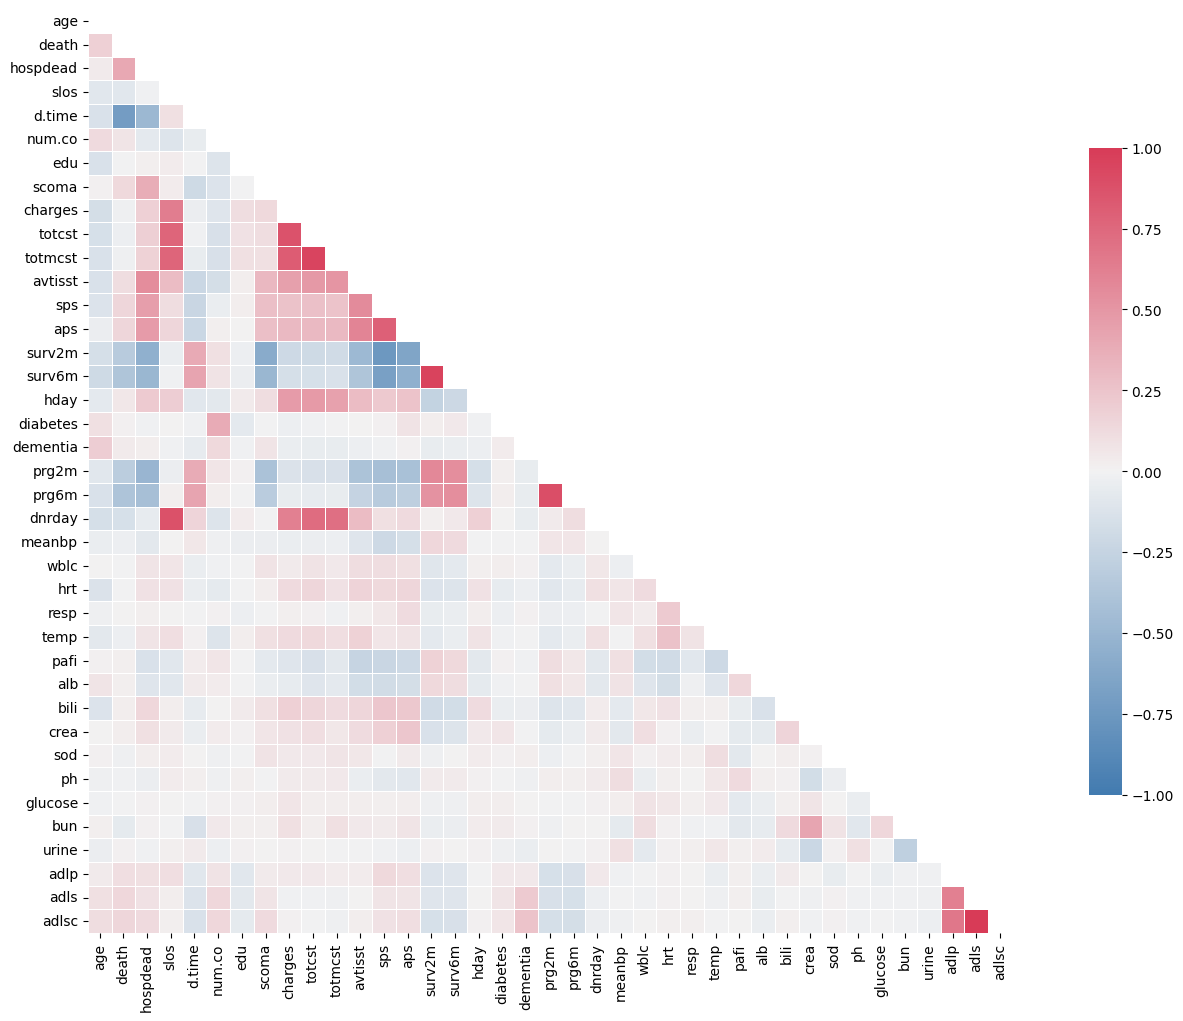

In [ ]:
numericcols = data.select_dtypes(np.number)
corr = numericcols.corr()

plt.figure(figsize=(20,12))

cmap = sns.diverging_palette(245, 6, as_cmap = True)
mask = np.triu(np.ones_like(corr, dtype = bool))

sns.heatmap(corr, cmap = cmap, mask = mask,
            square = True, center = 0, vmin = -1, vmax = 1,
            cbar_kws = {'shrink':0.7}, annot = False, annot_kws = {'size':3},
            linewidths = 0.5)

In [ ]:
imputed_df = pd.read_csv('/content/completed_data.csv')

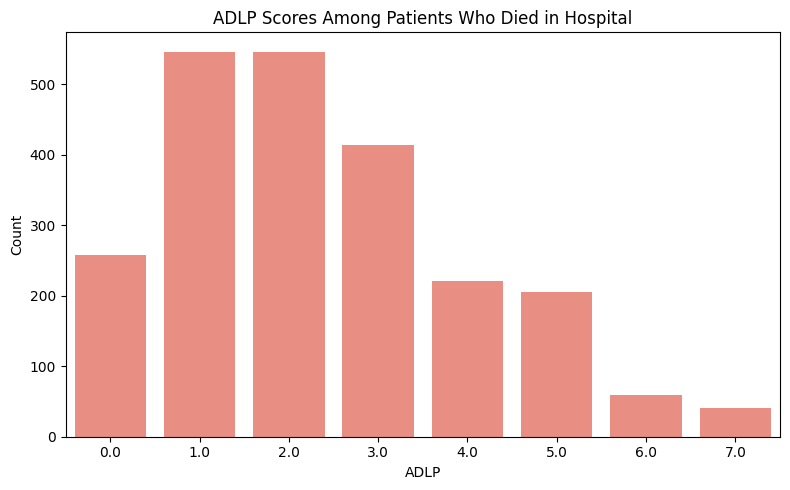

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filter the data
dead_df = imputed_df[imputed_df['hospdead'] == 1]

plt.figure(figsize=(8, 5))
sns.countplot(data=dead_df, x='adlp', order=sorted(dead_df['adlp'].unique()), color='salmon')
plt.title('ADLP Scores Among Patients Who Died in Hospital')
plt.xlabel('ADLP')
plt.ylabel('Count')
plt.tight_layout()
plt.show()


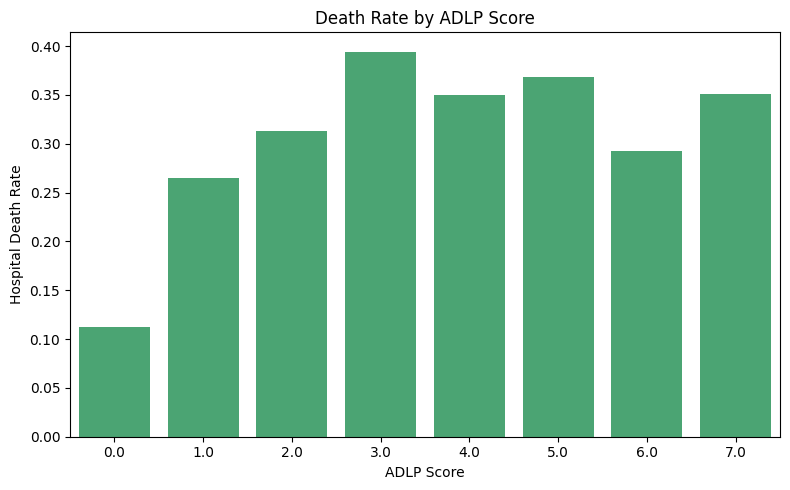

In [ ]:
# Calculate death rate per adlp
grouped = imputed_df.groupby('adlp')['hospdead'].mean().sort_index()

# Plot it
plt.figure(figsize=(8, 5))
sns.barplot(x=grouped.index, y=grouped.values, color='mediumseagreen')
plt.ylabel('Hospital Death Rate')
plt.xlabel('ADLP Score')
plt.title('Death Rate by ADLP Score')
plt.tight_layout()
plt.show()


Knowing that the ADLP score is measured on Day 3 of hospitalization and that the data description explicitly states "Higher values indicate more chance of survival" makes the bar plot showing an increasing hospital death rate with higher ADLP scores directly contradictory to the definition provided in the data.



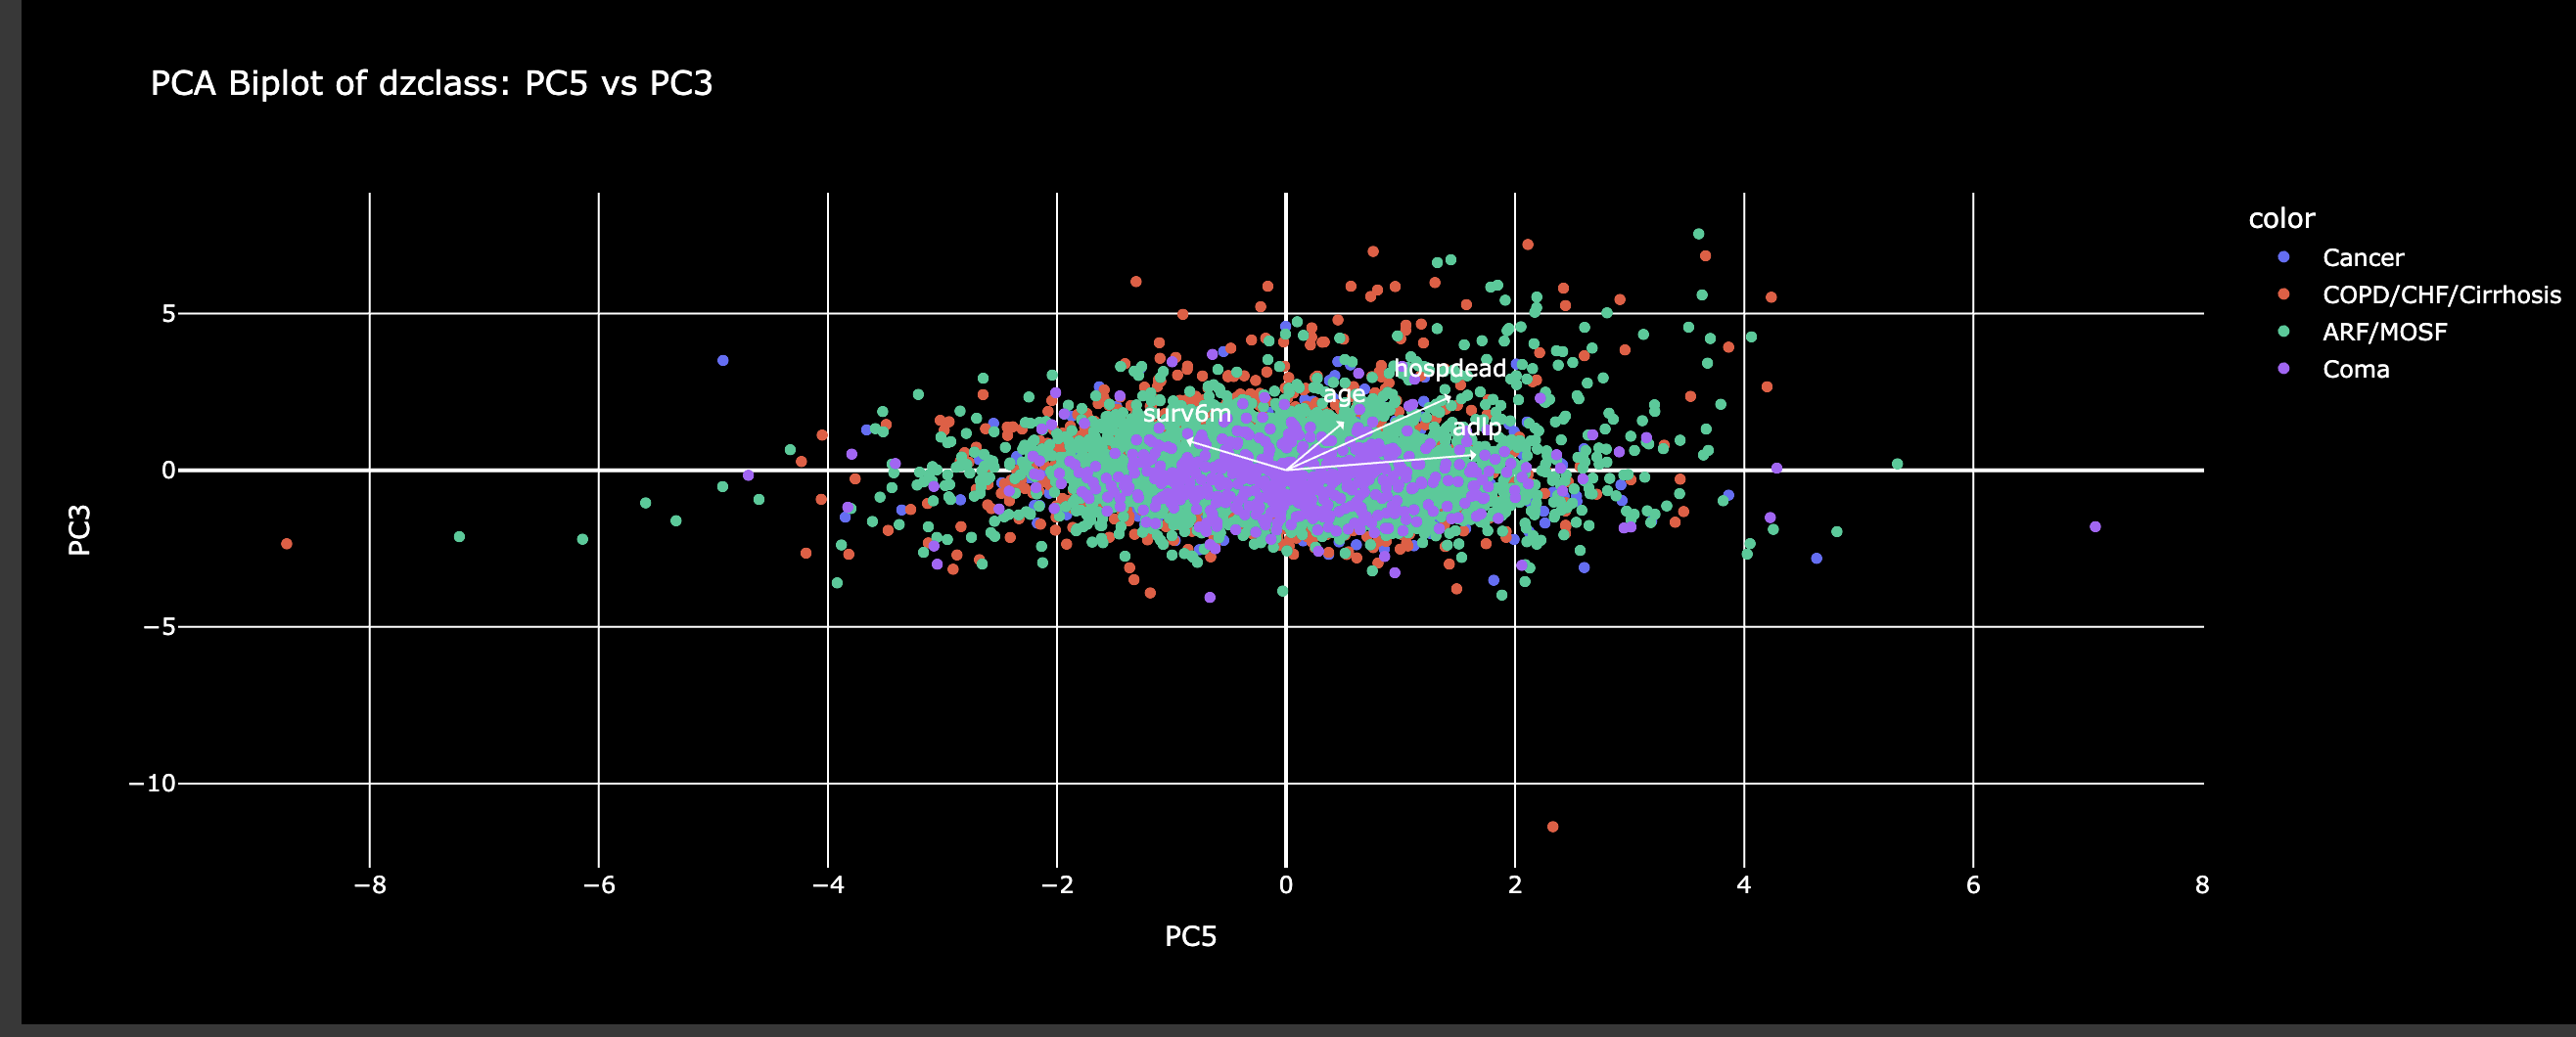

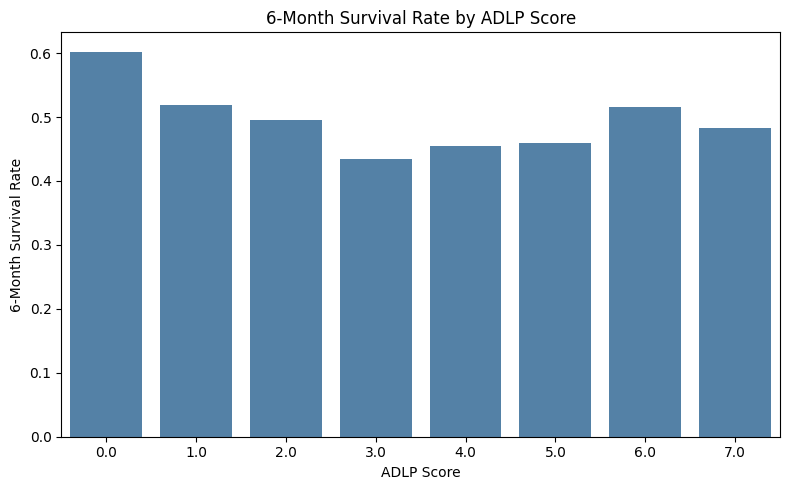

In [ ]:
# Calculate 6-month survival rate per ADLP score
grouped_surv = imputed_df.groupby('adlp')['surv6m'].mean().sort_index()

# Plot it
plt.figure(figsize=(8, 5))
sns.barplot(x=grouped_surv.index, y=grouped_surv.values, color='steelblue')
plt.ylabel('6-Month Survival Rate')
plt.xlabel('ADLP Score')
plt.title('6-Month Survival Rate by ADLP Score')
plt.tight_layout()
plt.show()


In [ ]:
corr_ps = data['sps'].corr(data['aps'])
corr_dnslos = data['slos'].corr(data['dnrday'])
print(corr_ps)
print(corr_dnslos)

0.7952962685555548
0.8826553661233545


In [ ]:
# data.drop(columns = ['totcst', 'charges', 'surv2m', 'prg2m', 'adls', 'adlp'], inplace = True)
# missing_summary(data)

data.drop(columns = ['totcst', 'charges', 'surv2m', 'prg2m', 'adls'], inplace = True)
missing_summary(data)

Feature  Missing Count  Missing_Percent    Dtype
0     adlp           5538        61.870182  float64
1  glucose           4459        49.815663  float64
2  totmcst           3414        38.140990  float64
3   income           2911        32.521506   object
4       ph           2234        24.958105  float64
5    prg6m           1593        17.796894  float64
6      edu           1587        17.729863  float64
7    sfdm2           1372        15.327896   object

In [ ]:
data.shape

(8951, 42)

In [ ]:
data['sfdm2'].value_counts()

sfdm2
<2 mo. follow-up       3076
no(M2 and SIP pres)    2997
adl>=4 (>=5 if sur)     908
SIP>=30                 558
Coma or Intub            40
Name: count, dtype: int64

In [ ]:
# encoding categoricals
#Index(['sex', 'dzgroup', 'dzclass', 'income', 'race', 'ca', 'dnr', 'sfdm2'], dtype='object')
df = data.copy()

# 1. sfdm2

sfdm2_mapping = {
    "<2 mo. follow-up": 5,
    "no(M2 and SIP pres)": 1,
    "adl>=4 (>=5 if sur)": 2,
    "SIP>=30": 3,
    "Coma or Intub": 4
}

df["sfdm2"] = df["sfdm2"].map(sfdm2_mapping)

# data["sfdm2"] = data["sfdm2"].fillna(6).astype(int) # problem: ordinally 6 would impy the highest severity, when in reality it is simply unknown.

label_encoder = LabelEncoder()

# 2. sex
df['sex'] = label_encoder.fit_transform(df['sex'])

# 3. ca
df['ca'] = label_encoder.fit_transform(df['ca'])

In [ ]:
df.shape

(8951, 42)

In [ ]:
df.select_dtypes(include='object').columns

Index(['dzgroup', 'dzclass', 'income', 'race', 'dnr'], dtype='object')

In [ ]:
missing_summary(df)

Feature  Missing Count  Missing_Percent    Dtype
0     adlp           5538        61.870182  float64
1  glucose           4459        49.815663  float64
2  totmcst           3414        38.140990  float64
3   income           2911        32.521506   object
4       ph           2234        24.958105  float64
5    prg6m           1593        17.796894  float64
6      edu           1587        17.729863  float64
7    sfdm2           1372        15.327896  float64

```
sex: This is likely binary (male, female) and could be
treated as binary (1, 0), which can be achieved through
label encoding. Label encoding is okay for this since
there’s a natural binary classification.

dzgroup and dzclass: These are likely nominal categorical
variables (without an inherent order). You should
apply one-hot encoding to avoid introducing any
unintended relationships.

income: This can be treated as nominal (if it’s
not ordinal, e.g., "low", "medium", "high"), so
one-hot encoding is a good choice.

race: This is typically nominal (no inherent order),
so one-hot encoding is recommended.

ca: If this is a binary variable (e.g., presence or
absence of cancer), you could apply label encoding (0, 1).

dnr: This variable could be nominal (with categories
like "yes", "no", "missing"), so one-hot encoding is appropriate.

sfdm2: The nature of this variable depends on its
categories. If it's nominal, then one-hot encoding
is best; if it's ordinal, you could consider label encoding.

```

In [ ]:
df_cop = df.copy()

In [ ]:
# manual OHE

df['dzgroup_arf_mosf'] = (df['dzgroup'] == 'ARF/MOSF w/Sepsis').astype(int)
df['dzgroup_chf'] = (df['dzgroup'] == 'CHF').astype(int)
df['dzgroup_copd'] = (df['dzgroup'] == 'COPD').astype(int)
df['dzgroup_lung_cancer'] = (df['dzgroup'] == 'Lung Cancer').astype(int)
df['dzgroup_mosf_malig'] = (df['dzgroup'] == 'MOSF w/Malig').astype(int)
df['dzgroup_coma'] = (df['dzgroup'] == 'Coma').astype(int)
df['dzgroup_cirrhosis'] = (df['dzgroup'] == 'Cirrhosis').astype(int)
df['dzgroup_colon_cancer'] = (df['dzgroup'] == 'Colon Cancer').astype(int)

df.drop('dzgroup', axis=1, inplace=True)


In [ ]:
df['dzclass_arf_mosf'] = (df['dzclass'] == 'ARF/MOSF').astype(int)
df['dzclass_copd_chf_cirrhosis'] = (df['dzclass'] == 'COPD/CHF/Cirrhosis').astype(int)
df['dzclass_cancer'] = (df['dzclass'] == 'Cancer').astype(int)
df['dzclass_coma'] = (df['dzclass'] == 'Coma').astype(int)

df.drop('dzclass', axis=1, inplace=True)


In [ ]:
df['race_white'] = (df['race'] == 'white').astype(int)
df['race_black'] = (df['race'] == 'black').astype(int)
df['race_hispanic'] = (df['race'] == 'hispanic').astype(int)
df['race_other'] = (df['race'] == 'other').astype(int)
df['race_asian'] = (df['race'] == 'asian').astype(int)

df.drop('race', axis=1, inplace=True)


In [ ]:
df['dnr_no_dnr'] = (df['dnr'] == 'no dnr').astype(int)
df['dnr_after_sadm'] = (df['dnr'] == 'dnr after sadm').astype(int)
df['dnr_before_sadm'] = (df['dnr'] == 'dnr before sadm').astype(int)

df.drop('dnr', axis=1, inplace=True)


In [ ]:
income_map = {
    'under $11k': 1,
    '$11-$25k': 2,
    '$25-$50k': 3,
    '>$50k': 4
}
df['income_encoded'] = df['income'].map(income_map)

In [ ]:
df['income_encoded'].isna().sum()

np.int64(2911)

In [ ]:
df.drop(columns = 'income', inplace= True)

In [ ]:
df.shape

(8951, 58)

In [ ]:
edu_mode = df['edu'].mode()[0]
df['edu'].fillna(edu_mode, inplace=True)

<ipython-input-38-a81905492ba1>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['edu'].fillna(edu_mode, inplace=True)


In [ ]:
missing_summary(df)

Feature  Missing Count  Missing_Percent    Dtype
0            adlp           5538        61.870182  float64
1         glucose           4459        49.815663  float64
2         totmcst           3414        38.140990  float64
3  income_encoded           2911        32.521506  float64
4              ph           2234        24.958105  float64
5           prg6m           1593        17.796894  float64
6           sfdm2           1372        15.327896  float64

```
Multiple Imputation via Chained Equations
```

In [ ]:
imp = IterativeImputer(
    estimator=BayesianRidge(),
    max_iter=100,
    random_state=42 # random seed check √
)

imp_data = imp.fit_transform(df)
# time to fit: 1m18s

In [ ]:
imputed_df = pd.DataFrame(imp_data, columns=df.columns, index=data.index)
missing_summary(imputed_df)

Empty DataFrame
Columns: [Feature, Missing Count, Missing_Percent, Dtype]
Index: []

In [ ]:
imputed_df.drop(columns = 'adlsc', inplace= True)

In [ ]:
imputed_df.columns

Index(['age', 'death', 'sex', 'hospdead', 'slos', 'd.time', 'num.co', 'edu',
       'scoma', 'totmcst', 'avtisst', 'sps', 'aps', 'surv6m', 'hday',
       'diabetes', 'dementia', 'ca', 'prg6m', 'dnrday', 'meanbp', 'wblc',
       'hrt', 'resp', 'temp', 'pafi', 'alb', 'bili', 'crea', 'sod', 'ph',
       'glucose', 'bun', 'urine', 'adlp', 'sfdm2', 'dzgroup_arf_mosf',
       'dzgroup_chf', 'dzgroup_copd', 'dzgroup_lung_cancer',
       'dzgroup_mosf_malig', 'dzgroup_coma', 'dzgroup_cirrhosis',
       'dzgroup_colon_cancer', 'dzclass_arf_mosf',
       'dzclass_copd_chf_cirrhosis', 'dzclass_cancer', 'dzclass_coma',
       'race_white', 'race_black', 'race_hispanic', 'race_other', 'race_asian',
       'dnr_no_dnr', 'dnr_after_sadm', 'dnr_before_sadm', 'income_encoded'],
      dtype='object')

In [ ]:
imputed_df.isna().sum().sum()

np.int64(0)

In [ ]:
imputed_df['income_encoded'] = imputed_df['income_encoded'].round().clip(1, 4)
imputed_df['adlp'] = imputed_df['adlp'].round().clip(0, 7)
imputed_df['sfdm2'] = imputed_df['sfdm2'].round().clip(1, 5)

In [ ]:
imputed_df[['income_encoded', 'adlp', 'sfdm2']].head(15).T

1    3    4    5    6    7    8    9    10   11   12   13  \
income_encoded  2.0  1.0  1.0  2.0  2.0  3.0  2.0  2.0  3.0  2.0  3.0  2.0   
adlp            7.0  1.0  0.0  2.0  1.0  0.0  0.0  5.0  0.0  2.0  1.0  0.0   
sfdm2           2.0  5.0  1.0  1.0  5.0  1.0  2.0  4.0  2.0  1.0  5.0  1.0   

                 14   15   16  
income_encoded  2.0  2.0  4.0  
adlp            0.0  4.0  2.0  
sfdm2           1.0  3.0  2.0

In [ ]:
imputed_df[['hospdead', 'prg6m', 'age']].head(15).T

1         3         4         5         6         7   \
hospdead   0.00000   0.00000   0.00000   0.00000   1.00000   0.00000   
prg6m      0.25000   0.50000   0.50000   0.90000   0.00000   0.70000   
age       62.84998  52.74698  42.38498  79.88495  93.01599  62.37097   

                8          9          10        11         12         13  \
hospdead   0.00000   0.000000   0.000000   0.00000   1.000000   0.000000   
prg6m      0.40000   0.000125   0.632027   0.50000   0.294097   0.679084   
age       86.83899  85.655940  42.258970  47.94498  59.200990  29.002000   

                14        15      16  
hospdead   0.00000   0.00000   0.000  
prg6m      0.70000   0.90000   0.700  
age       68.14197  43.53998  58.823

In [ ]:
df_cop.to_csv('alt_data.csv', index = False)

```
At long last, PCA
```

In [ ]:
physio_vars = [
    'meanbp', 'wblc', 'hrt', 'resp', 'temp',
    'pafi', 'alb', 'bili', 'crea', 'sod',
    'ph', 'glucose', 'bun', 'urine', 'age'
]
X = imputed_df[physio_vars]
groups = df_cop['dzgroup']   # make sure to pull from the same df!

# 2. Standardize
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 3. Fit PCA to 65% cumulative variance
pca = PCA(n_components=0.9, random_state=42)
PCs = pca.fit_transform(X_scaled)

# 4. Figure out how many PCs we got
actual_k = PCs.shape[1]
print(f"PCA selected {actual_k} components to explain {pca.explained_variance_ratio_.sum()*100:.1f}% of variance")

# 5. Build column labels correctly
pc_labels = [f"PC{i+1}" for i in range(actual_k)]

# 6. Put into a DataFrame
pc_df = pd.DataFrame(PCs, columns=pc_labels, index=imputed_df.index)

# 7. (Optional) Merge back any metadata you want for plotting
plot_df = pd.concat([
    pc_df,
    df_cop[['hospdead', 'adlp', 'sps', 'dzgroup', 'num.co', 'dzclass', 'sex', 'edu', 'income', 'sfdm2']]
], axis=1)

# Quick check
print(plot_df.head())
print("\nExplained variance ratios per component:")
for i, ratio in enumerate(pca.explained_variance_ratio_, 1):
    print(f"  PC{i}: {ratio:.3f}")

# And if you like, you can rebuild your loadings DataFrame
loadings = pd.DataFrame(
    pca.components_.T * np.sqrt(pca.explained_variance_),
    index=physio_vars,
    columns=pc_labels
)
print("\nScaled loadings:")
print(loadings)


PCA selected 13 components to explain 92.1% of variance
        PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
1 -1.256331 -0.297367  0.725667  0.113046  0.378294 -0.334705  0.186876   
3 -0.452857  0.319021  0.543406 -0.285699 -0.199977  0.347849 -0.185559   
4 -1.217861 -0.235433  0.596741  0.238763 -0.003919  0.989288 -1.138530   
5 -0.302475  0.844126 -0.862587 -0.750707  0.562464 -0.533653  1.521664   
6 -1.433346  1.870848 -0.833427  1.441064 -0.600428  0.787013  3.165137   

        PC8       PC9      PC10  ...  hospdead  adlp        sps  \
1  0.790896  0.325466 -1.929573  ...         0   7.0  33.898438   
3 -0.139288 -0.609717  0.856904  ...         0   1.0  20.500000   
4  0.091573  0.463570  0.330244  ...         0   0.0  20.097656   
5  0.352531 -0.602225  0.727864  ...         0   NaN  23.500000   
6  1.288516 -0.726441  0.549141  ...         1   NaN  19.398438   

             dzgroup  num.co             dzclass sex   edu      income  sfdm2  
1        L

In [ ]:
pc_df.head(4).T

1         3         4         5
PC1  -1.256331 -0.452857 -1.217861 -0.302475
PC2  -0.297367  0.319021 -0.235433  0.844126
PC3   0.725667  0.543406  0.596741 -0.862587
PC4   0.113046 -0.285699  0.238763 -0.750707
PC5   0.378294 -0.199977 -0.003919  0.562464
PC6  -0.334705  0.347849  0.989288 -0.533653
PC7   0.186876 -0.185559 -1.138530  1.521664
PC8   0.790896 -0.139288  0.091573  0.352531
PC9   0.325466 -0.609717  0.463570 -0.602225
PC10 -1.929573  0.856904  0.330244  0.727864
PC11 -0.677145  0.017631 -1.300979 -0.263140
PC12  0.819745  0.134264  0.655955 -0.420648
PC13 -0.196539 -0.514998 -0.286433 -0.099796

In [ ]:
sns.set(style="whitegrid", context="notebook")

# Function to plot any two principal components
def plot_pca_scatter(df, x_pc='PC1', y_pc='PC2', hue='dzgroup', palette=['green','orange','brown','dodgerblue','red']):
    plt.figure(figsize=(8, 6))
    sns.scatterplot(
        data=df,
        x=x_pc, y=y_pc,
        hue=hue,
        palette=palette,
        alpha=1,
        s=40,
        edgecolor='w',
        linewidth=0.5
    )
    plt.title(f'{x_pc} vs {y_pc} colored by {hue}')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize='small', title=hue)
    plt.tight_layout()
    plt.show()

<ipython-input-51-9b73b24b0350>:6: UserWarning: The palette list has more values (5) than needed (4), which may not be intended.
  sns.scatterplot(


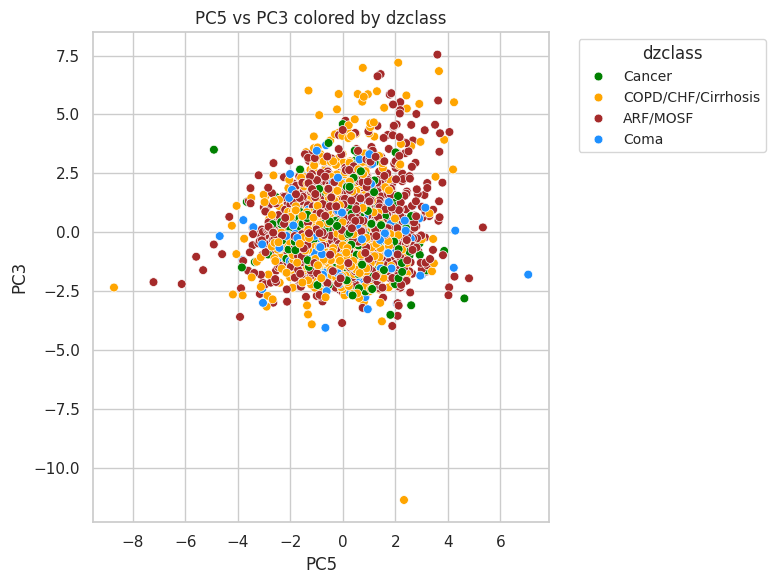

In [ ]:
plot_pca_scatter(plot_df, 'PC5', 'PC3', 'dzclass')

<ipython-input-51-9b73b24b0350>:6: UserWarning: The palette list has more values (5) than needed (4), which may not be intended.
  sns.scatterplot(


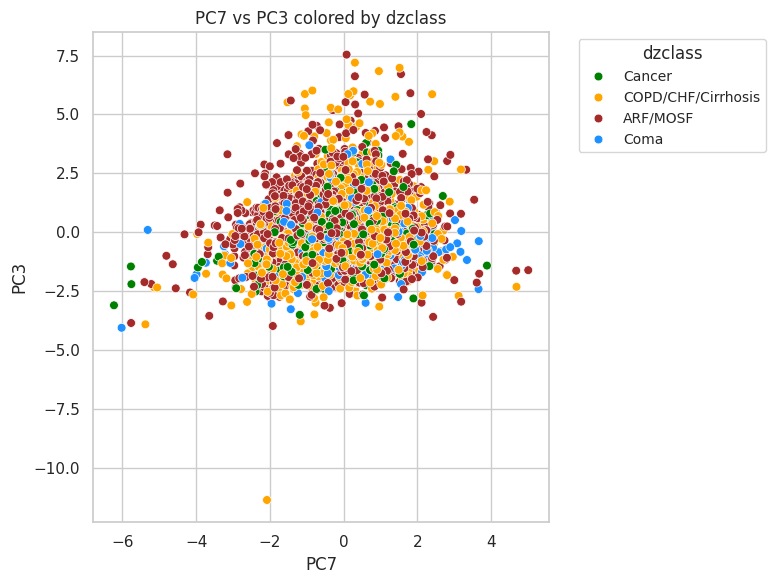

In [ ]:

plot_pca_scatter(plot_df, 'PC7', 'PC3', 'dzclass')


In [ ]:
imputed_df.columns

Index(['age', 'death', 'sex', 'hospdead', 'slos', 'd.time', 'num.co', 'edu',
       'scoma', 'totmcst', 'avtisst', 'sps', 'aps', 'surv6m', 'hday',
       'diabetes', 'dementia', 'ca', 'prg6m', 'dnrday', 'meanbp', 'wblc',
       'hrt', 'resp', 'temp', 'pafi', 'alb', 'bili', 'crea', 'sod', 'ph',
       'glucose', 'bun', 'urine', 'adlp', 'sfdm2', 'dzgroup_arf_mosf',
       'dzgroup_chf', 'dzgroup_copd', 'dzgroup_lung_cancer',
       'dzgroup_mosf_malig', 'dzgroup_coma', 'dzgroup_cirrhosis',
       'dzgroup_colon_cancer', 'dzclass_arf_mosf',
       'dzclass_copd_chf_cirrhosis', 'dzclass_cancer', 'dzclass_coma',
       'race_white', 'race_black', 'race_hispanic', 'race_other', 'race_asian',
       'dnr_no_dnr', 'dnr_after_sadm', 'dnr_before_sadm', 'income_encoded'],
      dtype='object')

In [ ]:
corrs = pd.DataFrame(index=[f"PC{i+1}" for i in range(PCs.shape[1])])

for feat in ['prg6m','surv6m','adlp','sfdm2','hospdead','age', 'death', 'slos', 'dzclass_arf_mosf', 'dzclass_copd_chf_cirrhosis', 'dzgroup_arf_mosf', 'dzgroup_chf', 'dzgroup_coma']:
    corrs[feat] = [
        np.corrcoef(PCs[:,i], imputed_df[feat])[0,1]
        for i in range(PCs.shape[1])
    ]

print(corrs)


         prg6m    surv6m      adlp     sfdm2  hospdead       age     death  \
PC1  -0.098365 -0.186839  0.038802  0.124999  0.174780 -0.101957 -0.033637   
PC2  -0.020253 -0.017218 -0.019245  0.037235  0.055020 -0.273202 -0.040409   
PC3   0.017271  0.014601 -0.015624  0.015295  0.028563 -0.540410 -0.051961   
PC4   0.097146  0.128604 -0.027084 -0.084972 -0.088850 -0.177871 -0.055042   
PC5  -0.003694  0.012308 -0.001292 -0.006875  0.032281 -0.110357 -0.022741   
PC6  -0.025380 -0.030636  0.009965  0.013646 -0.000664  0.060626  0.036174   
PC7  -0.090088 -0.118342  0.068006  0.082341  0.036809  0.504375  0.084507   
PC8  -0.110456 -0.190184  0.082708  0.097500  0.084021  0.421764  0.098971   
PC9  -0.035233 -0.042105  0.033319  0.038602  0.033946  0.041849  0.031529   
PC10 -0.029736 -0.025690 -0.029203  0.000945  0.025049 -0.114323  0.006403   
PC11 -0.070919 -0.110251  0.011318  0.052430  0.052261  0.275214  0.077479   
PC12  0.036624  0.064129 -0.034748 -0.035747 -0.042110 -0.160289

In [ ]:
pca.n_components_

np.int64(13)

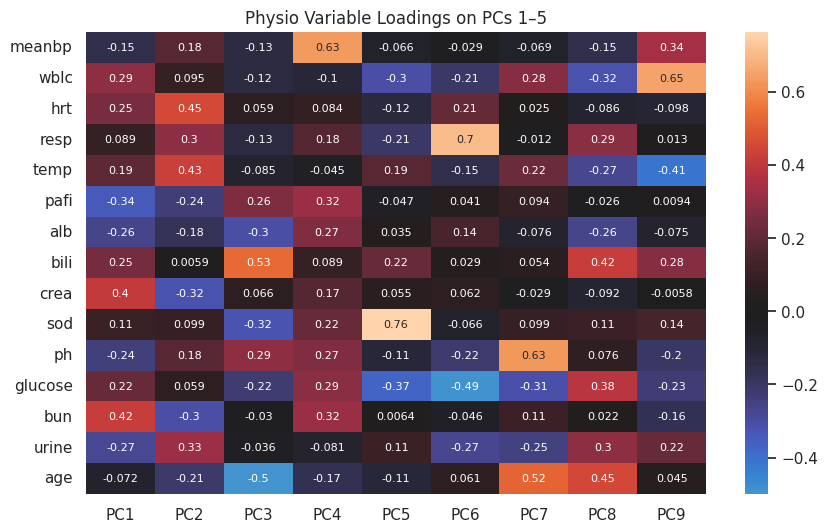

In [ ]:
plt.figure(figsize = (10,6))
loadings = pd.DataFrame(pca.components_.T,
                        index=physio_vars,
                        columns=[f"PC{i+1}" for i in range(pca.n_components_)])
sns.heatmap(loadings.iloc[:,:9], annot=True, center=0, annot_kws={'size': 8})
plt.title("Physio Variable Loadings on PCs 1–5")
plt.show()


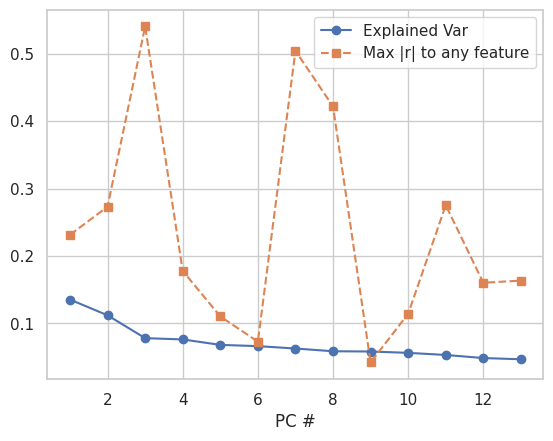

In [ ]:
max_corr = corrs.abs().max(axis=1)
plt.plot(range(1,len(max_corr)+1), pca.explained_variance_ratio_, 'o-', label='Explained Var')
plt.plot(range(1,len(max_corr)+1), max_corr, 's--', label='Max |r| to any feature')
plt.xlabel('PC #'); plt.legend(); plt.show()


In [ ]:
features = ['surv6m','adlp','hospdead','age']

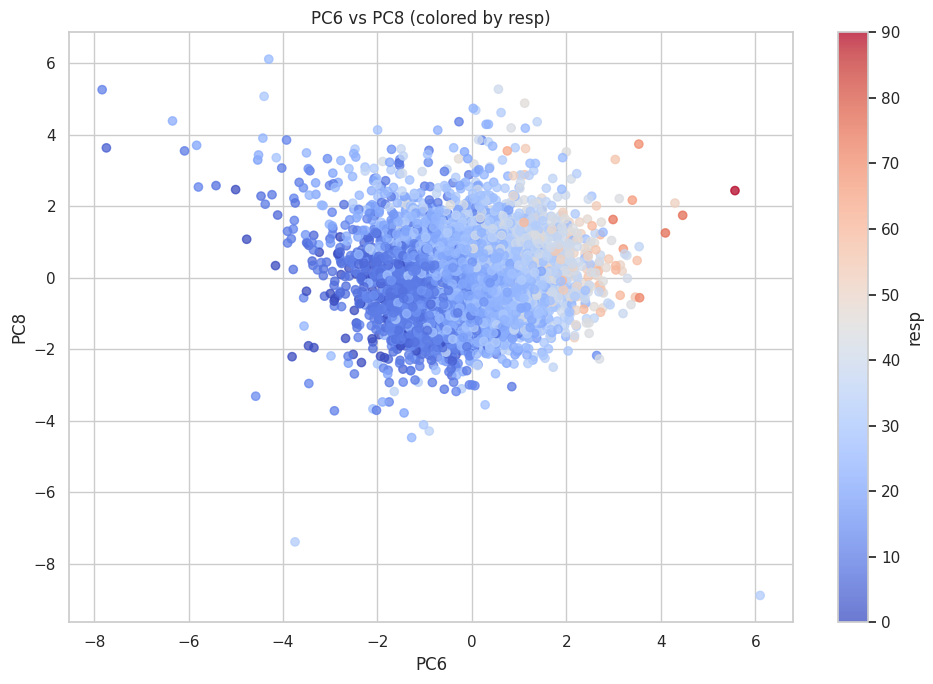

In [ ]:
# PC1 vs PC2
plt.figure(figsize=(10,7))
plt.scatter(pc_df['PC6'], pc_df['PC8'], c=imputed_df['resp'], cmap='coolwarm', alpha=0.75)
plt.xlabel('PC6')
plt.ylabel('PC8')
plt.title('PC6 vs PC8 (colored by resp)')
plt.colorbar(label='resp')
plt.tight_layout()
plt.show()

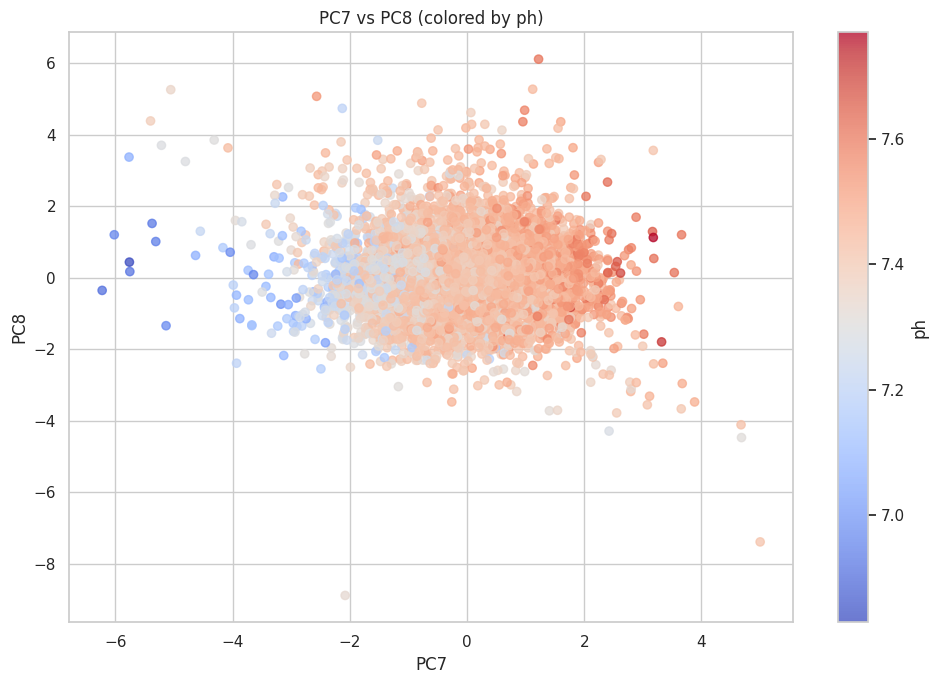

In [ ]:
# PC1 vs PC2
plt.figure(figsize=(10,7))
plt.scatter(pc_df['PC7'], pc_df['PC8'], c=imputed_df['ph'], cmap='coolwarm', alpha=0.75)
plt.xlabel('PC7')
plt.ylabel('PC8')
plt.title('PC7 vs PC8 (colored by ph)')
plt.colorbar(label='ph')
plt.tight_layout()
plt.show()

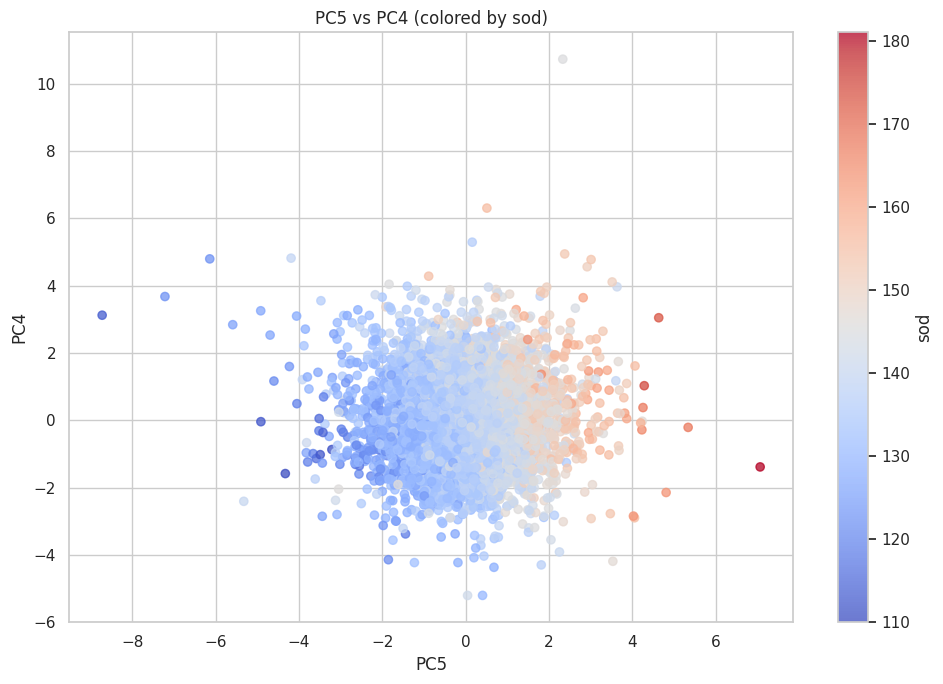

In [ ]:
# PC1 vs PC2
plt.figure(figsize=(10,7))
plt.scatter(pc_df['PC5'], pc_df['PC4'], c=imputed_df['sod'], cmap='coolwarm', alpha=0.75)
plt.xlabel('PC5')
plt.ylabel('PC4')
plt.title('PC5 vs PC4 (colored by sod)')
plt.colorbar(label='sod')
plt.tight_layout()
plt.show()

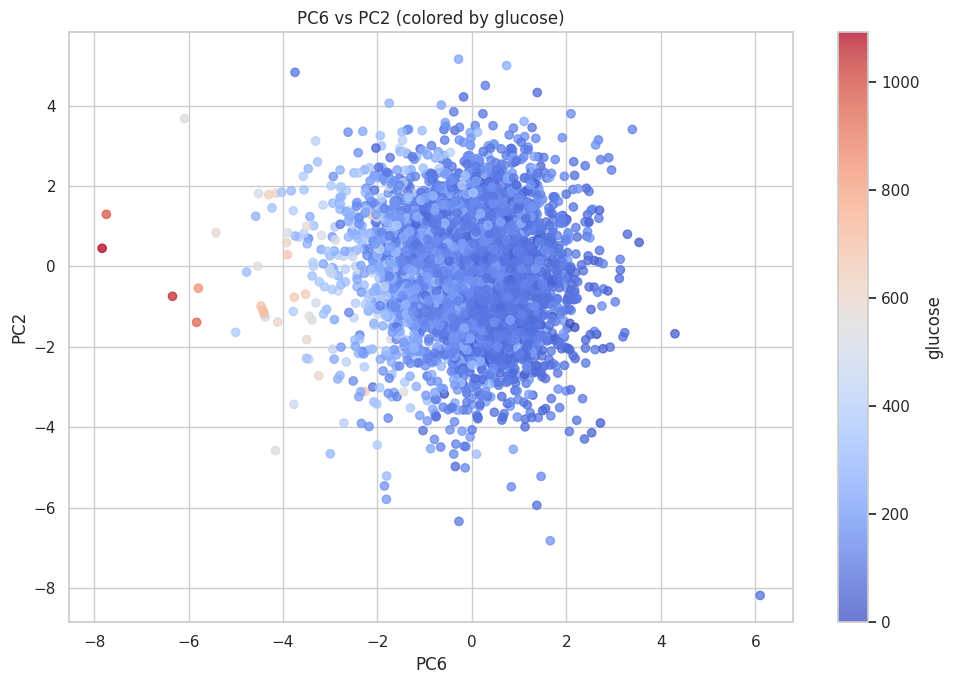

In [ ]:
# PC1 vs PC3
plt.figure(figsize=(10,7))
plt.scatter(pc_df['PC6'], pc_df['PC2'], c=df['glucose'], cmap='coolwarm', alpha=0.75)
plt.xlabel('PC6')
plt.ylabel('PC2')
plt.title('PC6 vs PC2 (colored by glucose)')
plt.colorbar(label='glucose')
plt.tight_layout()
plt.show()

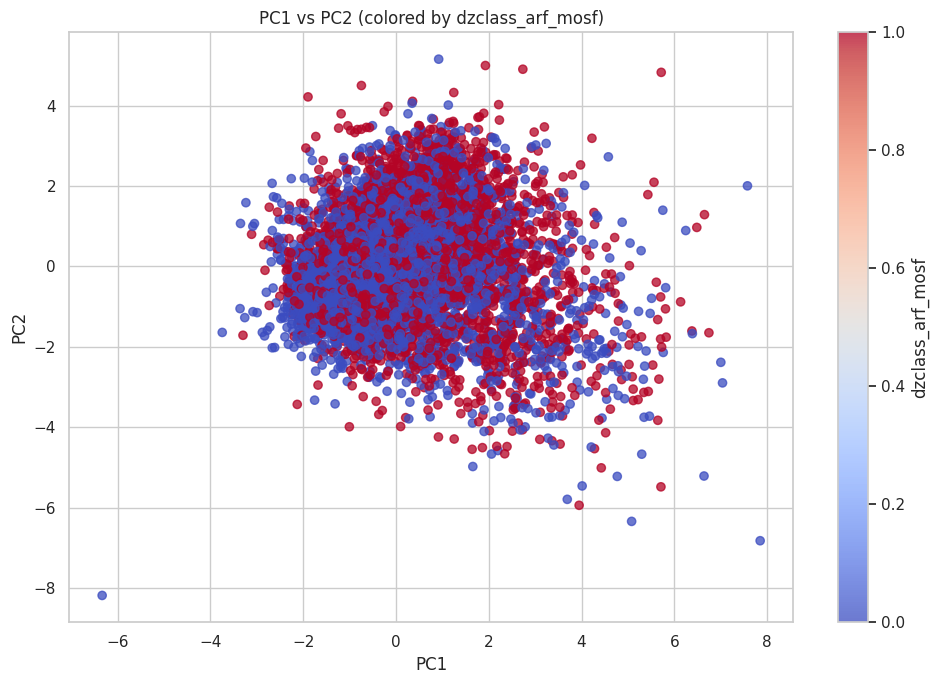

In [ ]:
# PC2 vs PC3
plt.figure(figsize=(10,7))
plt.scatter(pc_df['PC1'], pc_df['PC2'], c=imputed_df['dzclass_arf_mosf'], cmap='coolwarm', alpha=0.75)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PC1 vs PC2 (colored by dzclass_arf_mosf)')
plt.colorbar(label='dzclass_arf_mosf')
plt.tight_layout()
plt.show()

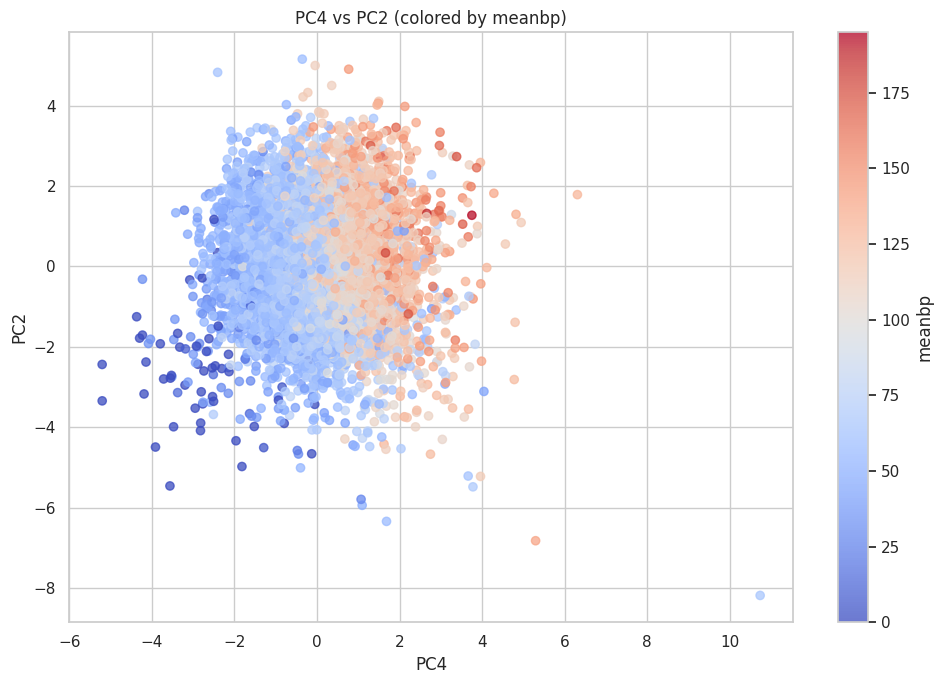

In [ ]:
# PC2 vs PC3
plt.figure(figsize=(10,7))
plt.scatter(pc_df['PC4'], pc_df['PC2'], c=df['meanbp'], cmap='coolwarm', alpha=0.75)
plt.xlabel('PC4')
plt.ylabel('PC2')
plt.title('PC4 vs PC2 (colored by meanbp)')
plt.colorbar(label='meanbp')
plt.tight_layout()
plt.show()

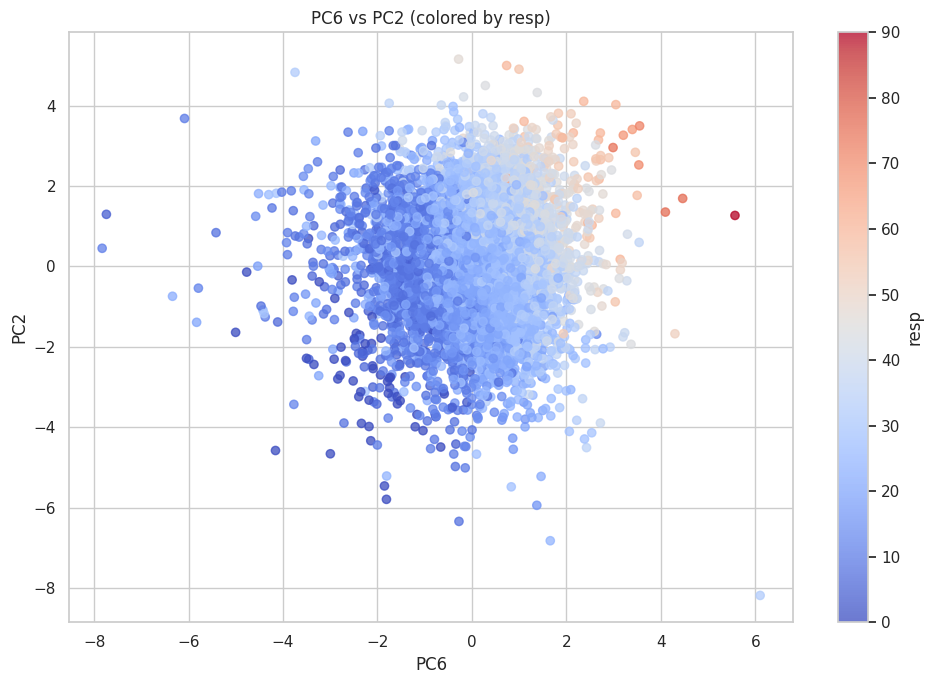

In [ ]:
# PC2 vs PC3
plt.figure(figsize=(10,7))
plt.scatter(pc_df['PC6'], pc_df['PC2'], c=df['resp'], cmap='coolwarm', alpha=0.75)
plt.xlabel('PC6')
plt.ylabel('PC2')
plt.title('PC6 vs PC2 (colored by resp)')
plt.colorbar(label='resp')
plt.tight_layout()
plt.show()

In [ ]:


actual_k = PCs.shape[1]
total_variance = pca.explained_variance_ratio_.sum() * 100

axis_labels = {i: f"PC{i+1}" for i in range(actual_k)}

fig = px.scatter_matrix(
    PCs,
    dimensions=list(range(actual_k)),           # which PCs to include
    color=df_cop["ph"],                   # color by adlp
    labels=axis_labels,                             # axis labels
    title=f"Pairwise PCA Scatter Matrix<br>Total Explained Variance: {total_variance:.2f}%",
    width=1400,
    height=1200,
    opacity=0.75,
)

fig.update_traces(diagonal_visible=False)

fig.show()


In [ ]:


actual_k = PCs.shape[1]
total_variance = pca.explained_variance_ratio_.sum() * 100

axis_labels = {i: f"PC{i+1}" for i in range(actual_k)}

fig = px.scatter_matrix(
    PCs,
    dimensions=list(range(actual_k)),           # which PCs to include
    color=df["resp"],                   # color by adlp
    labels=axis_labels,                             # axis labels
    title=f"Pairwise PCA Scatter Matrix<br>Total Explained Variance: {total_variance:.2f}%",
    width=1400,
    height=1200,
    opacity=0.75,
)

fig.update_traces(diagonal_visible=False)

fig.show()


In [ ]:


actual_k = PCs.shape[1]
total_variance = pca.explained_variance_ratio_.sum() * 100

axis_labels = {i: f"PC{i+1}" for i in range(actual_k)}

fig = px.scatter_matrix(
    PCs,
    dimensions=list(range(actual_k)),           # which PCs to include
    color=df["bili"],                   # color by adlp
    labels=axis_labels,                             # axis labels
    title=f"Pairwise PCA Scatter Matrix<br>Total Explained Variance: {total_variance:.2f}%",
    width=1400,
    height=1200,
    opacity=0.75,
)

fig.update_traces(diagonal_visible=False)

fig.show()


In [ ]:


actual_k = PCs.shape[1]
total_variance = pca.explained_variance_ratio_.sum() * 100

axis_labels = {i: f"PC{i+1}" for i in range(actual_k)}

fig = px.scatter_matrix(
    PCs,
    dimensions=list(range(actual_k)),           # which PCs to include
    color=df_cop["dzgroup"],                   # color by adlp
    labels=axis_labels,                             # axis labels
    title=f"Pairwise PCA Scatter Matrix<br>Total Explained Variance: {total_variance:.2f}%",
    width=1400,
    height=1200,
    opacity=0.75,
)

fig.update_traces(diagonal_visible=False)

fig.show()


In [ ]:


actual_k = PCs.shape[1]
total_variance = pca.explained_variance_ratio_.sum() * 100

axis_labels = {i: f"PC{i+1}" for i in range(actual_k)}

fig = px.scatter_matrix(
    PCs,
    dimensions=list(range(actual_k)),           # which PCs to include
    color=df["glucose"],                   # color by adlp
    labels=axis_labels,                             # axis labels
    title=f"Pairwise PCA Scatter Matrix<br>Total Explained Variance: {total_variance:.2f}%",
    width=1400,
    height=1200,
    opacity=0.75,
)

fig.update_traces(diagonal_visible=False)

fig.show()


In [ ]:
# pca = PCA(n_components= 0.75, random_state= 42)
# components = pca.fit_transform(X_scaled)


actual_k = PCs.shape[1]
total_variance = pca.explained_variance_ratio_.sum() * 100

axis_labels = {i: f"PC{i+1}" for i in range(actual_k)}

fig = px.scatter_matrix(
    PCs,
    dimensions=list(range(actual_k)),           # which PCs to include
    color=plot_df["dzclass"],                   # color by adlp
    labels=axis_labels,                             # axis labels
    title=f"Pairwise PCA Scatter Matrix<br>Total Explained Variance: {total_variance:.2f}%",
    width=1400,
    height=1200,
    opacity=0.5,
)

fig.update_traces(diagonal_visible=False)

fig.show()


In [ ]:
plot_pca_scatter(plot_df, 'PC1', 'PC8', 'sfdm2')

In [ ]:

components = PCs

# Compute loadings
loadings = pca.components_.T * np.sqrt(pca.explained_variance_)

# 2D scatter
fig = px.scatter(
    x=components[:, 8],
    y=components[:, 4],
    color=df_cop["dzclass"],
    labels={'x': 'PC5', 'y': 'PC3'},
    title='PCA Biplot of dzclass: PC5 vs PC3'
)

scale = 12  # try 2, 3, 4…whatever feels right

for i, feature in enumerate(features):
    x_load = loadings[i, 0]
    y_load = loadings[i, 1]

    # head at (x_load, y_load), tail at (-scale*x_load, -scale*y_load)
    fig.add_annotation(
        x=x_load * scale,
        y=y_load * scale,
        ax=0,
        ay=0,
        xref="x",
        yref="y",
        axref="x",
        ayref="y",
        showarrow=True,
        arrowhead=1,
        arrowsize=1,
        arrowwidth=1,
        arrowcolor="white",
        font=dict(color="white", size=16),
        xanchor="right",
        yanchor="top"
    )
    fig.add_annotation(
        x=x_load * scale,
        y=y_load * scale,
        text=feature,
        showarrow=False,
        font=dict(color="white", size=16),
        xanchor="center",
        yanchor="bottom",
        yshift=5
    )


# Darken background for contrast
fig.update_layout(
    plot_bgcolor='black',
    paper_bgcolor='black',
    legend=dict(font=dict(color='white')),
    title_font=dict(color='white'),
    xaxis=dict(color='white'),
    yaxis=dict(color='white')
)

fig.show()


Since surv6m points left and adlp, age, and hospital death point right, this suggests a negative correlation between surv6m and adlp, surv6m and age, and surv6m and hospital death in this projection. For example, higher adlp, age, or hospital death are associated with lower surv6m. (Note: The negative correlation between surv6m and adlp is counter-intuitive from a typical clinical perspective and is an interesting observation specific to how these variables project onto PC5 and PC3 in this dataset).


In [ ]:

components = PCs

# Compute loadings
loadings = pca.components_.T * np.sqrt(pca.explained_variance_)

# 2D scatter
fig = px.scatter(
    x=components[:, 0],
    y=components[:, 3],
    color=df["crea"],
    labels={'x': 'PC1', 'y': 'PC2'},
    title='PCA Biplot of Disease groups: PC1 vs PC5'
)

scale = 4  # try 2, 3, 4…whatever feels right

for i, feature in enumerate(features):
    x_load = loadings[i, 0]
    y_load = loadings[i, 1]

    # head at (x_load, y_load), tail at (-scale*x_load, -scale*y_load)
    fig.add_annotation(
        x=x_load * scale,
        y=y_load * scale,
        ax=0,
        ay=0,
        xref="x",
        yref="y",
        axref="x",
        ayref="y",
        showarrow=True,
        arrowhead=1,
        arrowsize=1,
        arrowwidth=1,
        arrowcolor="white",
        font=dict(color="white", size=12),
        xanchor="right",
        yanchor="top"
    )
    fig.add_annotation(
        x=x_load * scale,
        y=y_load * scale,
        text=feature,
        showarrow=False,
        font=dict(color="white", size=12),
        xanchor="center",
        yanchor="bottom",
        yshift=5
    )


# Darken background for contrast
fig.update_layout(
    plot_bgcolor='black',
    paper_bgcolor='black',
    legend=dict(font=dict(color='white')),
    title_font=dict(color='white'),
    xaxis=dict(color='white'),
    yaxis=dict(color='white')
)

fig.show()


In [ ]:

components = PCs

# Compute loadings
loadings = pca.components_.T * np.sqrt(pca.explained_variance_)

# 2D scatter
fig = px.scatter(
    x=components[:, 0],
    y=components[:, 1],
    color=plot_df["dzgroup"],
    labels={'x': 'PC1', 'y': 'PC2'},
    title='PCA Biplot of Disease groups: PC1 vs PC5'
)

scale = 4  # try 2, 3, 4…whatever feels right

for i, feature in enumerate(features):
    x_load = loadings[i, 0]
    y_load = loadings[i, 1]

    # head at (x_load, y_load), tail at (-scale*x_load, -scale*y_load)
    fig.add_annotation(
        x=x_load * scale,
        y=y_load * scale,
        ax=0,
        ay=0,
        xref="x",
        yref="y",
        axref="x",
        ayref="y",
        showarrow=True,
        arrowhead=1,
        arrowsize=1,
        arrowwidth=1,
        arrowcolor="white",
        font=dict(color="white", size=12),
        xanchor="right",
        yanchor="top"
    )
    fig.add_annotation(
        x=x_load * scale,
        y=y_load * scale,
        text=feature,
        showarrow=False,
        font=dict(color="white", size=12),
        xanchor="center",
        yanchor="bottom",
        yshift=5
    )


# Darken background for contrast
fig.update_layout(
    plot_bgcolor='black',
    paper_bgcolor='black',
    legend=dict(font=dict(color='white')),
    title_font=dict(color='white'),
    xaxis=dict(color='white'),
    yaxis=dict(color='white')
)

fig.show()


In [ ]:

components = PCs

# Compute loadings
loadings = pca.components_.T * np.sqrt(pca.explained_variance_)

# 2D scatter
fig = px.scatter(
    x=components[:, 0],
    y=components[:, 1],
    color=imputed_df['age'],
    labels={'x': 'PC1', 'y': 'PC2'},
    title='PCA Biplot AGE: PC1 vs PC2'
)

scale = 4  # try 2, 3, 4…whatever feels right

for i, feature in enumerate(features):
    x_load = loadings[i, 0]
    y_load = loadings[i, 1]

    # head at (x_load, y_load), tail at (-scale*x_load, -scale*y_load)
    fig.add_annotation(
        x=x_load * scale,
        y=y_load * scale,
        ax=0,
        ay=0,
        xref="x",
        yref="y",
        axref="x",
        ayref="y",
        showarrow=True,
        arrowhead=1,
        arrowsize=1,
        arrowwidth=1,
        arrowcolor="white",
        font=dict(color="white", size=12),
        xanchor="right",
        yanchor="top"
    )
    fig.add_annotation(
        x=x_load * scale,
        y=y_load * scale,
        text=feature,
        showarrow=False,
        font=dict(color="white", size=12),
        xanchor="center",
        yanchor="bottom",
        yshift=5
    )


# Darken background for contrast
fig.update_layout(
    plot_bgcolor='black',
    paper_bgcolor='black',
    legend=dict(font=dict(color='white')),
    title_font=dict(color='white'),
    xaxis=dict(color='white'),
    yaxis=dict(color='white')
)

fig.show()


In [ ]:

components = PCs

# Compute loadings
loadings = pca.components_.T * np.sqrt(pca.explained_variance_)

# 2D scatter
fig = px.scatter(
    x=components[:, 3],
    y=components[:, 1],
    color=imputed_df['meanbp'],
    labels={'x': 'PC4', 'y': 'PC2'},
    title='PCA Biplot Mean BP: PC4 vs PC5'
)

scale = 4  # try 2, 3, 4…whatever feels right

for i, feature in enumerate(features):
    x_load = loadings[i, 0]
    y_load = loadings[i, 1]

    # head at (x_load, y_load), tail at (-scale*x_load, -scale*y_load)
    fig.add_annotation(
        x=x_load * scale,
        y=y_load * scale,
        ax=0,
        ay=0,
        xref="x",
        yref="y",
        axref="x",
        ayref="y",
        showarrow=True,
        arrowhead=1,
        arrowsize=1,
        arrowwidth=1,
        arrowcolor="white",
        font=dict(color="white", size=12),
        xanchor="right",
        yanchor="top"
    )
    fig.add_annotation(
        x=x_load * scale,
        y=y_load * scale,
        text=feature,
        showarrow=False,
        font=dict(color="white", size=12),
        xanchor="center",
        yanchor="bottom",
        yshift=5
    )


# Darken background for contrast
fig.update_layout(
    plot_bgcolor='black',
    paper_bgcolor='black',
    legend=dict(font=dict(color='white')),
    title_font=dict(color='white'),
    xaxis=dict(color='white'),
    yaxis=dict(color='white')
)

fig.show()


In [ ]:
components = PCs

# Compute loadings
loadings = pca.components_.T * np.sqrt(pca.explained_variance_)

# 2D scatter
fig = px.scatter(
    x=components[:, 2],
    y=components[:, 1],
    color=imputed_df['bili'],
    labels={'x': 'PC5', 'y': 'PC1'},
    title='PCA Biplot Sodium: PC5 vs PC1'
)

scale = 4  # try 2, 3, 4…whatever feels right

for i, feature in enumerate(features):
    x_load = loadings[i, 0]
    y_load = loadings[i, 1]

    # head at (x_load, y_load), tail at (-scale*x_load, -scale*y_load)
    fig.add_annotation(
        x=x_load * scale,
        y=y_load * scale,
        ax=0,
        ay=0,
        xref="x",
        yref="y",
        axref="x",
        ayref="y",
        showarrow=True,
        arrowhead=1,
        arrowsize=1,
        arrowwidth=1,
        arrowcolor="white",
        font=dict(color="white", size=12),
        xanchor="right",
        yanchor="top"
    )
    fig.add_annotation(
        x=x_load * scale,
        y=y_load * scale,
        text=feature,
        showarrow=False,
        font=dict(color="white", size=12),
        xanchor="center",
        yanchor="bottom",
        yshift=5
    )


# Darken background for contrast
fig.update_layout(
    plot_bgcolor='black',
    paper_bgcolor='black',
    legend=dict(font=dict(color='white')),
    title_font=dict(color='white'),
    xaxis=dict(color='white'),
    yaxis=dict(color='white')
)

fig.show()


In [ ]:
components = PCs

# Compute loadings
loadings = pca.components_.T * np.sqrt(pca.explained_variance_)

# 2D scatter
fig = px.scatter(
    x=components[:, 2],
    y=components[:, 6],
    color=imputed_df['age'],
    labels={'x': 'PC5', 'y': 'PC1'},
    title='PCA Biplot Sodium: PC5 vs PC1'
)

scale = 4  # try 2, 3, 4…whatever feels right

for i, feature in enumerate(features):
    x_load = loadings[i, 0]
    y_load = loadings[i, 1]

    # head at (x_load, y_load), tail at (-scale*x_load, -scale*y_load)
    fig.add_annotation(
        x=x_load * scale,
        y=y_load * scale,
        ax=0,
        ay=0,
        xref="x",
        yref="y",
        axref="x",
        ayref="y",
        showarrow=True,
        arrowhead=1,
        arrowsize=1,
        arrowwidth=1,
        arrowcolor="white",
        font=dict(color="white", size=12),
        xanchor="right",
        yanchor="top"
    )
    fig.add_annotation(
        x=x_load * scale,
        y=y_load * scale,
        text=feature,
        showarrow=False,
        font=dict(color="white", size=12),
        xanchor="center",
        yanchor="bottom",
        yshift=5
    )


# Darken background for contrast
fig.update_layout(
    plot_bgcolor='black',
    paper_bgcolor='black',
    legend=dict(font=dict(color='white')),
    title_font=dict(color='white'),
    xaxis=dict(color='white'),
    yaxis=dict(color='white')
)

fig.show()


In [ ]:
components = PCs

# Compute loadings
loadings = pca.components_.T * np.sqrt(pca.explained_variance_)

# 2D scatter
fig = px.scatter(
    x=components[:, 4],
    y=components[:, 1],
    color=imputed_df['sod'],
    labels={'x': 'PC5', 'y': 'PC1'},
    title='PCA Biplot Sodium: PC5 vs PC1'
)

scale = 4  # try 2, 3, 4…whatever feels right

for i, feature in enumerate(features):
    x_load = loadings[i, 0]
    y_load = loadings[i, 1]

    # head at (x_load, y_load), tail at (-scale*x_load, -scale*y_load)
    fig.add_annotation(
        x=x_load * scale,
        y=y_load * scale,
        ax=0,
        ay=0,
        xref="x",
        yref="y",
        axref="x",
        ayref="y",
        showarrow=True,
        arrowhead=1,
        arrowsize=1,
        arrowwidth=1,
        arrowcolor="white",
        font=dict(color="white", size=12),
        xanchor="right",
        yanchor="top"
    )
    fig.add_annotation(
        x=x_load * scale,
        y=y_load * scale,
        text=feature,
        showarrow=False,
        font=dict(color="white", size=12),
        xanchor="center",
        yanchor="bottom",
        yshift=5
    )


# Darken background for contrast
fig.update_layout(
    plot_bgcolor='black',
    paper_bgcolor='black',
    legend=dict(font=dict(color='white')),
    title_font=dict(color='white'),
    xaxis=dict(color='white'),
    yaxis=dict(color='white')
)

fig.show()


In [ ]:
import plotly.graph_objects as go
import numpy as np

# Base 3D scatter of patient scores
fig = go.Figure()
fig.add_trace(go.Scatter3d(
    x=components[:,0], y=components[:,1], z=components[:,2],
    mode='markers',
    marker=dict(size=3, color=imputed_df['meanbp'], colorscale='Viridis'),
    name='Patients'
))

# Parameters for arrows
arrow_length = 6.0   # how far out in PC units you want your arrows
cone_size = 0.1      # controls cone head size

# Add one cone per feature
for i, feat in enumerate(features):
    u, v, w = loadings[i,0], loadings[i,1], loadings[i,2]
    # normalize then scale
    norm = np.sqrt(u**2 + v**2 + w**2)
    u_s, v_s, w_s = (u/norm*arrow_length, v/norm*arrow_length, w/norm*arrow_length)

    # draw cone (arrow head) at tip
    fig.add_trace(go.Cone(
        x=[0], y=[0], z=[0],
        u=[u_s], v=[v_s], w=[w_s],
        colorscale=[[0, 'white'], [1, 'white']],
        showscale=False,
        sizemode='scaled',
        sizeref=cone_size,
        anchor='tail',
        name=feat
    ))
    # label at arrow tip
    fig.add_trace(go.Scatter3d(
        x=[u_s], y=[v_s], z=[w_s],
        mode='text',
        text=[feat],
        textfont=dict(color='white', size=14),
        showlegend=False
    ))

# Dark theme for contrast
total_var = pca.explained_variance_ratio_.sum()*100
fig.update_layout(
    title=f'3D PCA Biplot (Total explained: {total_var:.1f}%)',
    scene=dict(xaxis_title='PC1', yaxis_title='PC2', zaxis_title='PC3',
               bgcolor='black'),
    paper_bgcolor='black',
    legend_font_color='white',
    margin=dict(l=0, r=0, b=0, t=50)
)

fig.show()


In [ ]:
import plotly.graph_objects as go
import numpy as np

# Base 3D scatter of patient scores
fig = go.Figure()
fig.add_trace(go.Scatter3d(
    x=components[:,0], y=components[:,1], z=components[:,2],
    mode='markers',
    marker=dict(size=3, color=imputed_df['age'], colorscale='Viridis'),
    name='Patients'
))

# Parameters
arrow_length = 6.0   # how far out you want the arrows to go

# Draw one black “arrow” per feature (just a line plus a text label)
for i, feat in enumerate(features):
    u, v, w = loadings[i,0], loadings[i,1], loadings[i,2]
    norm = np.sqrt(u**2 + v**2 + w**2)
    u_s, v_s, w_s = u/norm*arrow_length, v/norm*arrow_length, w/norm*arrow_length

    # Line from origin to (u_s, v_s, w_s)
    fig.add_trace(go.Scatter3d(
        x=[0, u_s], y=[0, v_s], z=[0, w_s],
        mode='lines+text',
        line=dict(color='gray', width=4),
        text=[None, feat],
        textposition='top center',
        textfont=dict(color='black', size=12),
        showlegend=False
    ))

# Layout tweaks
total_var = pca.explained_variance_ratio_.sum() * 100
fig.update_layout(
    title=f'3D PCA Biplot (Total explained: {total_var:.1f}%)',
    scene=dict(
        xaxis_title='PC1', yaxis_title='PC2', zaxis_title='PC3',
        bgcolor='white'   # white background for clarity
    ),
    paper_bgcolor='white',
    margin=dict(l=0, r=0, b=0, t=50)
)

# Dark theme for contrast
total_var = pca.explained_variance_ratio_.sum()*100
fig.update_layout(
    title=f'3D PCA Biplot (Total explained: {total_var:.1f}%)',
    scene=dict(xaxis_title='PC1', yaxis_title='PC2', zaxis_title='PC3',
               bgcolor='black'),
    paper_bgcolor='black',
    legend_font_color='white',
    margin=dict(l=0, r=0, b=0, t=50)
)

fig.show()


In [ ]:
import plotly.graph_objects as go

fig = go.Figure()

for grp in plot_df['dzgroup'].unique():
    mask = plot_df['dzgroup'] == grp
    fig.add_trace(go.Scatter3d(
        x=plot_df.loc[mask,'PC1'],
        y=plot_df.loc[mask,'PC2'],
        z=plot_df.loc[mask,'PC3'],
        mode='markers',
        name=str(grp),
        marker=dict(size=4),
    ))

# # (Then add arrows as before…)

# fig.update_layout(
#     title='3D PCA Biplot (by dzgroup)',
#     scene=dict(xaxis_title='PC1', yaxis_title='PC2', zaxis_title='PC3'),
#     width=800, height=600
# )

# Layout tweaks
total_var = pca.explained_variance_ratio_.sum() * 100
fig.update_layout(
    title=f'3D PCA Biplot (Total explained: {total_var:.1f}%)',
    scene=dict(
        xaxis_title='PC1', yaxis_title='PC2', zaxis_title='PC3',
        bgcolor='white'   # white background for clarity
    ),
    paper_bgcolor='white',
    margin=dict(l=0, r=0, b=0, t=50)
)

# Dark theme for contrast
total_var = pca.explained_variance_ratio_.sum()*100
fig.update_layout(
    title=f'3D PCA Biplot (Total explained: {total_var:.1f}%)',
    scene=dict(xaxis_title='PC1', yaxis_title='PC2', zaxis_title='PC3',
               bgcolor='black'),
    paper_bgcolor='black',
    legend_font_color='white',
    margin=dict(l=0, r=0, b=0, t=50)
)

fig.show()


In [ ]:
df['dzgroup'].value_counts()

In [ ]:
import plotly.express as px
import plotly.graph_objects as go
import numpy as np

# Boolean masks
is_sepsis = plot_df['dzgroup'] == 'ARF/MOSF w/Sepsis'
not_sepsis = ~is_sepsis

# 1) Biplot for ARF/MOSF w/Sepsis (single color)
fig1 = go.Figure()
fig1.add_trace(go.Scatter3d(
    x=components[is_sepsis,0],
    y=components[is_sepsis,1],
    z=components[is_sepsis,2],
    mode='markers',
    marker=dict(size=3, color='orangered'),
    name='ARF/MOSF w/Sepsis'
))
# (Add arrows as before…)
# … [arrow‐drawing loop identical to what you had above] …
fig1.update_layout(title='ARF/MOSF w/Sepsis Patients', paper_bgcolor='black',
                       scene=dict(
        bgcolor='black',                    # plot background
        xaxis=dict(
            backgroundcolor='black',
            showbackground=True,
            gridcolor='gray',
            zerolinecolor='gray'
        ),
        yaxis=dict(
            backgroundcolor='black',
            showbackground=True,
            gridcolor='gray',
            zerolinecolor='gray'
        ),
        zaxis=dict(
            backgroundcolor='black',
            showbackground=True,
            gridcolor='gray',
            zerolinecolor='gray'
        )
    ),
    margin=dict(l=0, r=0, b=0, t=50))
fig1.show()

subdf = plot_df[not_sepsis].copy()
subdf[['PC1','PC2','PC3']] = components[not_sepsis, :3]

# Match fig1’s dimensions
# FIG_W, FIG_H = 700, 600

# Create the colored scatter with explicit marker size
fig2 = px.scatter_3d(
    subdf, x='PC1', y='PC2', z='PC3',
    color='dzgroup',
    title='All Other Disease Groups',
    labels={'PC1':'PC1','PC2':'PC2','PC3':'PC3'},
    # width=FIG_W, height=FIG_H,
)

# Force the same small marker size (3) that you used in fig1
fig2.update_traces(marker=dict(size=3))

# Now overlay your arrows exactly as before
arrow_len = 4.0
for i, feat in enumerate(features):
    u, v, w = loadings[i,0], loadings[i,1], loadings[i,2]
    norm = np.linalg.norm([u,v,w])
    u_s, v_s, w_s = u/norm*arrow_len, v/norm*arrow_len, w/norm*arrow_len

    fig2.add_trace(go.Scatter3d(
        x=[0, u_s], y=[0, v_s], z=[0, w_s],
        mode='lines+text',
        line=dict(color='black', width=4),
        text=[None, feat],
        textposition='top center',
        textfont=dict(color='black', size=12),
        showlegend=False
    ))

# Match fig1’s background
# fig2.update_layout(
#     scene=dict(bgcolor='black'),
#     paper_bgcolor='black',
#     margin=dict(l=0, r=0, b=0, t=50),
# )

fig2.update_layout(
    scene=dict(
        bgcolor='black',                    # plot background
        xaxis=dict(
            backgroundcolor='black',
            showbackground=True,
            gridcolor='gray',
            zerolinecolor='gray'
        ),
        yaxis=dict(
            backgroundcolor='black',
            showbackground=True,
            gridcolor='gray',
            zerolinecolor='gray'
        ),
        zaxis=dict(
            backgroundcolor='black',
            showbackground=True,
            gridcolor='gray',
            zerolinecolor='gray'
        )
    ),
    paper_bgcolor='black',
    margin=dict(l=0, r=0, b=0, t=50)
)



fig2.show()



In [ ]:
import plotly.graph_objects as go

fig = go.Figure()

for grp in plot_df['dzclass'].unique():
    mask = plot_df['dzclass'] == grp
    fig.add_trace(go.Scatter3d(
        x=plot_df.loc[mask,'PC8'],
        y=plot_df.loc[mask,'PC2'],
        z=plot_df.loc[mask,'PC1'],
        mode='markers',
        name=str(grp),
        marker=dict(size=4),
    ))

# # (Then add arrows as before…)

# fig.update_layout(
#     title='3D PCA Biplot (by dzgroup)',
#     scene=dict(xaxis_title='PC1', yaxis_title='PC2', zaxis_title='PC3'),
#     width=800, height=600
# )

# Layout tweaks
total_var = pca.explained_variance_ratio_.sum() * 100
fig.update_layout(
    title=f'3D PCA Biplot (Total explained: {total_var:.1f}%)',
    scene=dict(
        xaxis_title='PC5', yaxis_title='PC3', zaxis_title='PC1',
        bgcolor='white'   # white background for clarity
    ),
    paper_bgcolor='white',
    margin=dict(l=0, r=0, b=0, t=50),
)

fig.update_layout(
    scene=dict(
        bgcolor='black',                    # plot background
        xaxis=dict(
            backgroundcolor='black',
            showbackground=True,
            gridcolor='gray',
            zerolinecolor='gray'
        ),
        yaxis=dict(
            backgroundcolor='black',
            showbackground=True,
            gridcolor='gray',
            zerolinecolor='gray'
        ),
        zaxis=dict(
            backgroundcolor='black',
            showbackground=True,
            gridcolor='gray',
            zerolinecolor='gray'
        )
    ),
    paper_bgcolor='black',
    margin=dict(l=0, r=0, b=0, t=50)
)

# Dark theme for contrast
total_var = pca.explained_variance_ratio_.sum()*100
fig.update_layout(
    title=f'3D PCA Biplot (Total explained: {total_var:.1f}%)',
    scene=dict(xaxis_title='PC1', yaxis_title='PC2', zaxis_title='PC3',
               bgcolor='black'),
    paper_bgcolor='black',
    legend_font_color='white',
    margin=dict(l=0, r=0, b=0, t=50)
)

fig.show()




---



In [ ]:


# physio_vars = [
#     'meanbp', 'wblc', 'hrt', 'resp', 'temp',
#     'pafi', 'alb', 'bili', 'crea', 'sod',
#     'ph', 'glucose', 'bun', 'urine', 'age'
# ]

X_scaled

In [ ]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=4, random_state=42, n_init='auto')
clusters = kmeans.fit_predict(X_scaled)
df_cop['kmeans_cluster'] = clusters  # Add to original df for exploration
df_cop['kmeans_cluster'].head(10).T

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_styled_scatter(df, x, y, hue, style=None, title=None, figsize=(10, 6), palette='Set2'):
    """
    Plots a styled Seaborn scatterplot with flexible x, y, hue, and style inputs.

    Parameters:
    - df: DataFrame containing the data
    - x: str, column name for x-axis
    - y: str, column name for y-axis
    - hue: str, column name for hue (color grouping)
    - style: str or None, column name for style (e.g., shape grouping)
    - title: str or None, plot title
    - figsize: tuple, figure size
    - palette: str or list, Seaborn color palette
    """
    plt.figure(figsize=figsize)
    sns.set(style='whitegrid', context='notebook')

    sns.scatterplot(
        data=df,
        x=x,
        y=y,
        hue=hue,
        style=style,
        palette=palette,
        s=80,
        edgecolor='white',
        alpha=0.8
    )

    plt.xlabel(x)
    plt.ylabel(y)
    if title:
        plt.title(title)
    else:
        plt.title(f'{y} vs {x} colored by {hue}' + (f' and styled by {style}' if style else ''))

    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
    plt.tight_layout()
    plt.show()


In [ ]:
plot_styled_scatter(df_cop, 'slos', 'd.time', hue = 'kmeans_cluster')

In [ ]:
df_cop['kmeans_cluster'] = df_cop['kmeans_cluster'].replace({
    0: 'cluster1',
    1: 'cluster2',
    2: 'cluster3',
    3: 'cluster4'
})


In [ ]:
df_cop['kmeans_cluster'].head()

In [ ]:
import plotly.express as px

features = [
    'meanbp', 'wblc', 'hrt', 'resp', 'temp', 'age'
]

features2 = [
        'pafi', 'alb', 'bili', 'crea', 'sod', 'age'
]

features3 = [
        'ph', 'glucose', 'bun', 'urine', 'age'
]
f = px.scatter_matrix(df_cop, dimensions = features, color = 'dzclass')
f.show()

In [ ]:
f = px.scatter_matrix(df_cop, dimensions = features2, color = 'kmeans_cluster')
f.show()

In [ ]:
f = px.scatter_matrix(df_cop, dimensions = features3, color = 'dzclass')
f.show()



---



```
UMAP
```

In [ ]:
!pip install umap-learn

In [ ]:
df_cop['sex'].value_counts()

In [ ]:
from umap import UMAP

physio_vars = ['meanbp', 'wblc', 'hrt', 'resp', 'temp',
    'pafi', 'alb', 'bili', 'crea', 'sod',
    'ph', 'glucose', 'bun', 'urine', 'age', 'sex', 'num.co', 'aps', 'scoma', 'diabetes', 'ca', 'adlp', 'sfdm2']
X = imputed_df[physio_vars]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

umap_2d = UMAP(n_components = 4, random_state = 42, init = 'random')
umap_3d = UMAP(n_components = 5, random_state = 42, init = 'random')

proj_2d = umap_2d.fit_transform(X_scaled)
proj_3d = umap_3d.fit_transform(X_scaled)

In [ ]:

fig_3d = px.scatter_3d(
    proj_2d, x= 0, y = 1, z = 2,
    color = umap_df['sfdm2'], labels = {'color': 'sfdm2'}
)
fig_3d.update_traces(
    marker_size = 2.5
)

In [ ]:
fig_2d = px.scatter(
    proj_2d, x= 0, y = 1,
    color = df_cop['sfdm2'], labels = {'color': 'sfdm2 Groups'}
)

fig_2d.show()

In [ ]:
df_cop.columns

In [ ]:
umap_df = pd.DataFrame(proj_2d, columns=["UMAP1", "UMAP2", "UMAP3", "UMAP4"])
umap_df["dzclass"] = df_cop["dzclass"].values

In [ ]:
extra_cols = [
    'age', 'death', 'sex', 'hospdead', 'slos', 'd.time', 'dzgroup',
    'dzclass', 'num.co', 'edu', 'income', 'scoma', 'totmcst', 'avtisst',
    'race', 'sps', 'aps', 'surv6m', 'hday', 'diabetes', 'dementia', 'ca',
    'prg6m', 'dnr', 'dnrday', 'meanbp', 'wblc', 'hrt', 'resp', 'temp',
    'pafi', 'alb', 'bili', 'crea', 'sod', 'ph', 'glucose', 'bun', 'urine',
    'adlp', 'sfdm2', 'adlsc', 'kmeans_cluster', 'kmeans_clusters'
]
umap_df = pd.concat([umap_df, df_cop[extra_cols].reset_index(drop=True)], axis=1)

In [ ]:
fig = px.scatter(
    umap_df, x="UMAP1", y="UMAP4", color="kmeans_cluster",
    title="UMAP Projection Colored by dzclass",
    labels={"UMAP1": "UMAP Dimension 1", "UMAP2": "UMAP Dimension 2"}
)

# Dark theme
fig.update_layout(
    plot_bgcolor='black',
    paper_bgcolor='black',
    legend=dict(font=dict(color='white')),
    title_font=dict(color='white'),
    xaxis=dict(color='white'),
    yaxis=dict(color='white')
)

fig.show()
